# Telecom Churn Case Study

## Problem Statement
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Business Objective
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Data is distributed into 3 phase
1.  Good Phase i.e. 6th and 7th month data where customer as not issues with the service.
2.  Action Phase i.e. 8th month data where customer experience starts to sore.
3.  Churn Phase i.e. 9th month data where  the customer is said to have churned.

In [ ]:
import os
os.environ['ML AI CASE STUDY WITH PCA'] = '/content/drive/My Drive/ML AI CASE STUDY WITH PCA'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML AI CASE STUDY WITH PCA/telecom_churn_data.csv")

In [ ]:
pd.set_option('display.max_columns',df.shape[1])

In [ ]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [ ]:
df.shape

(99999, 226)

#Data Cleaning

Finding columns which doesnt have more than one unique values to drop since they dont hold any predictive power

In [ ]:
drop = [col for col in df.columns if df[col].nunique()<25]


In [ ]:
for x in drop:
    print(x,df[x].nunique(),'unique values',df[x].unique(),df[x].isna().mean())

circle_id 1 unique values [109] 0.0
loc_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
std_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
loc_ic_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
last_date_of_month_6 1 unique values ['6/30/2014'] 0.0
last_date_of_month_7 1 unique values ['7/31/2014' nan] 0.006010060100601006
last_date_of_month_8 1 unique values ['8/31/2014' nan] 0.011000110001100011
last_date_of_month_9 1 unique values ['9/30/2014' nan] 0.016590165901659015
std_og_t2c_mou_6 1 unique values [nan  0.] 0.03937039370393704
std_og_t2c_mou_7 1 unique values [nan  0.] 0.03859038590385904
std_og_t2c_mou_8 1 unique values [ 0. nan] 0.05378053780537805
std_og_t2c_mou_9 1 unique values [nan  0.] 0.07745077450774508
std_ic_t2o_mou_6 1 unique values [nan  0.] 0.03937039370393704
std_ic_t2o_mou_7 1 unique values [nan  0.] 0.03859038590385904
std_ic_t2o_mou_8 1 unique values [ 0. nan] 0.05378053780537805
std_ic_t2o_mou_9 1 unique values [nan  0.] 0.077450774

Night pack user has 74 percent nan values so lets drop those columns

In [ ]:
df.drop(columns=['fb_user_6','fb_user_7','fb_user_8','fb_user_9'],inplace=True)

In [ ]:
df.drop(columns=['mobile_number','circle_id'],inplace=True)

In [ ]:
col = df.columns
li = []
for x in col:
    if 'date_' in x:
        li.append(x)
li

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

Lets drop the Date columns since we are not doing time series analysis

In [ ]:
df.drop(columns=li,inplace=True)

In [ ]:
col = df.columns
li = []
for x in col:
    if 'total' in x:
        li.append(x)
li


['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_og_mou_9',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_9',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9']

In [ ]:
df[['total_rech_num_6',
 'total_rech_num_7','total_rech_data_6',
 'total_rech_data_7','total_rech_amt_6',
 'total_rech_amt_7']].head()

,total_rech_num_6,total_rech_num_7,total_rech_data_6,total_rech_data_7,total_rech_amt_6,total_rech_amt_7
0,4,3,1.0,1.0,362,252
1,4,9,NaN,1.0,74,384
2,5,4,NaN,NaN,168,315
3,10,11,NaN,NaN,230,310
4,5,6,1.0,NaN,196,350


In [ ]:
for x in df[li].columns:
     print(x,df[x].nunique(),'unique values',df[x].unique(),df[x].isna().mean())

total_og_mou_6 40327 unique values [   0.     40.31  155.33 ...  464.58 1600.79  269.93] 0.0
total_og_mou_7 40477 unique values [   0.    178.53  412.94 ...  644.58  370.28 1183.21] 0.0
total_og_mou_8 40074 unique values [   0.    312.44  285.46 ...  329.51   23.98 1380.01] 0.0
total_og_mou_9 39160 unique values [   0.     72.11  124.94 ...  782.08 1095.24  139.43] 0.0
total_ic_mou_6 32247 unique values [  0.    26.83 370.04 ... 998.96 473.69 788.73] 0.0
total_ic_mou_7 32242 unique values [  0.   104.23 519.53 ... 219.06 622.28 374.98] 0.0
total_ic_mou_8 32128 unique values [   5.44  423.28  395.03 ...  420.46  660.01 1233.83] 0.0
total_ic_mou_9 31260 unique values [  0.   188.04 517.74 ... 445.49 313.06 275.19] 0.0
total_rech_num_6 102 unique values [  4   5  10   2  15  19   1   6   7  22   3   0   8  27  12  13  24  16
  33  11  14  18  28  31  44   9  21  25  17  23  32  63  58  46  39  29
  34  30  20  45  26  38  35  42  37  43  36  94  41  51  49  40  50  61
  53  66  48  91  97

### If customer doesnt recharge for any particular month then the average value of recharge wont be captured so lets put the nan values as 0.

In [ ]:
df[li].isnull().sum()

total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
total_og_mou_9           0
total_ic_mou_6           0
total_ic_mou_7           0
total_ic_mou_8           0
total_ic_mou_9           0
total_rech_num_6         0
total_rech_num_7         0
total_rech_num_8         0
total_rech_num_9         0
total_rech_amt_6         0
total_rech_amt_7         0
total_rech_amt_8         0
total_rech_amt_9         0
total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64

In [ ]:
 for x in li:
    df[x]=df[x].fillna(0)

In [ ]:
df[li].isnull().sum()

total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
total_og_mou_9       0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
total_ic_mou_9       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
total_rech_num_9     0
total_rech_amt_6     0
total_rech_amt_7     0
total_rech_amt_8     0
total_rech_amt_9     0
total_rech_data_6    0
total_rech_data_7    0
total_rech_data_8    0
total_rech_data_9    0
dtype: int64

### Derived columns for good phase from 1st 2 months.


In [ ]:
print(len(df['total_rech_data_8'].unique()))

47


In [ ]:
l = [x for x in df.columns if x not in li and df[x].isnull().sum()>0]
l

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [ ]:
for x in df[l].columns:
     print(x,df[x].nunique(),'unique values',df[x].unique(),df[x].isna().mean())

loc_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
std_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
loc_ic_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
onnet_mou_6 24313 unique values [   nan  24.11  11.54 ... 196.99 423.99 806.73] 0.03937039370393704
onnet_mou_7 24336 unique values [   nan  78.68  55.24 ... 168.81 168.46 549.36] 0.03859038590385904
onnet_mou_8 24089 unique values [  0.     7.68  37.26 ... 301.58 132.56 775.41] 0.05378053780537805
onnet_mou_9 23565 unique values [   nan  18.34  74.81 ... 128.71 206.69 692.63] 0.07745077450774508
offnet_mou_6 31140 unique values [   nan  15.74 143.33 ... 510.24 722.43 784.76] 0.03937039370393704
offnet_mou_7 31023 unique values [    nan   99.84  220.59 ... 1123.56  617.13  277.01] 0.03859038590385904
offnet_mou_8 30908 unique values [   0.    304.76  208.36 ...  905.11  707.68 1020.74] 0.05378053780537805
offnet_mou_9 30077 unique values [   nan  53.76 118.91 ... 359.71 602.26 378.93] 0.0774507745077450

In [ ]:
df.shape

(99999, 208)

dropping columns which have more than 70 percent null values

In [ ]:
li=[x for x in l if df[x].isnull().mean()>0.7]
li

['max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [ ]:
df.drop(columns=li,inplace=True)

In [ ]:
l = [x for x in df.columns if df[x].isnull().sum()>0]


In [ ]:
for x in df[l].columns:
     print(x,df[x].nunique(),'unique values',df[x].unique(),df[x].isna().mean())

loc_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
std_og_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
loc_ic_t2o_mou 1 unique values [ 0. nan] 0.010180101801018011
onnet_mou_6 24313 unique values [   nan  24.11  11.54 ... 196.99 423.99 806.73] 0.03937039370393704
onnet_mou_7 24336 unique values [   nan  78.68  55.24 ... 168.81 168.46 549.36] 0.03859038590385904
onnet_mou_8 24089 unique values [  0.     7.68  37.26 ... 301.58 132.56 775.41] 0.05378053780537805
onnet_mou_9 23565 unique values [   nan  18.34  74.81 ... 128.71 206.69 692.63] 0.07745077450774508
offnet_mou_6 31140 unique values [   nan  15.74 143.33 ... 510.24 722.43 784.76] 0.03937039370393704
offnet_mou_7 31023 unique values [    nan   99.84  220.59 ... 1123.56  617.13  277.01] 0.03859038590385904
offnet_mou_8 30908 unique values [   0.    304.76  208.36 ...  905.11  707.68 1020.74] 0.05378053780537805
offnet_mou_9 30077 unique values [   nan  53.76 118.91 ... 359.71 602.26 378.93] 0.0774507745077450

From the observation we come to know that there are columns which have only 2 values 0 and nan out of these majority more than 90 percent are 0 values and very few are nan values.
so lets impute those nan values as 1


In [ ]:
f = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']

In [ ]:
for x in f:
  df[x].fillna(1,inplace=True)

Now defining the churn based on the 9th month

In [ ]:
df['churn'] = df['total_ic_mou_9'] + df['total_og_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']

In [ ]:
df['churn'] = np.where(df['churn']==0,1,0)
df['churn'].mean()

0.1019110191101911

In [ ]:
df['churn'].sum()

10191

In [ ]:
df['std_og_t2c_mou_6_7'] = np.ceil((df['std_og_t2c_mou_6']+df['std_og_t2c_mou_7'])/2)

In [ ]:
df['std_ic_t2o_mou_6_7'] = np.ceil((df['std_ic_t2o_mou_6']+df['std_ic_t2o_mou_7'])/2)


In [ ]:
df.drop(columns=['std_og_t2c_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_6','std_ic_t2o_mou_7'],inplace=True)

In [ ]:
from sklearn.impute import KNNImputer,SimpleImputer

In [ ]:
df.shape

(99999, 179)

In [ ]:
l = [x for x in df.columns if df[x].isnull().sum()>0]

for x in df[l].columns:
     print(x,df[x].nunique(),'unique values',df[x].unique(),df[x].isna().mean())

onnet_mou_6 24313 unique values [   nan  24.11  11.54 ... 196.99 423.99 806.73] 0.03937039370393704
onnet_mou_7 24336 unique values [   nan  78.68  55.24 ... 168.81 168.46 549.36] 0.03859038590385904
onnet_mou_8 24089 unique values [  0.     7.68  37.26 ... 301.58 132.56 775.41] 0.05378053780537805
onnet_mou_9 23565 unique values [   nan  18.34  74.81 ... 128.71 206.69 692.63] 0.07745077450774508
offnet_mou_6 31140 unique values [   nan  15.74 143.33 ... 510.24 722.43 784.76] 0.03937039370393704
offnet_mou_7 31023 unique values [    nan   99.84  220.59 ... 1123.56  617.13  277.01] 0.03859038590385904
offnet_mou_8 30908 unique values [   0.    304.76  208.36 ...  905.11  707.68 1020.74] 0.05378053780537805
offnet_mou_9 30077 unique values [   nan  53.76 118.91 ... 359.71 602.26 378.93] 0.07745077450774508
roam_ic_mou_6 6512 unique values [   nan   0.    16.23 ... 172.53  45.19  32.71] 0.03937039370393704
roam_ic_mou_7 5230 unique values [   nan   0.    54.86 ...  49.24 182.14 104.94] 0.

If data is not recharged for any particular month than total_rech_data_ is nan so lets replace those nan values with 0.

In [ ]:
df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']] = df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0)

In [ ]:
df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
99994,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0
99996,2.0,0.0,0.0,0.0
99997,3.0,2.0,4.0,4.0


We are considering 6th and 7th month as the good phase month and there are nan values in those column as well.so lets impute 0 when 6 and 7 both have nan values else lets impute mean.For 8th month lets impute mean.

In [ ]:
df1 =  df.copy()

In [ ]:
df.loc[df['onnet_mou_6'].isnull() & df['onnet_mou_7'].isnull(),['onnet_mou_6','onnet_mou_7']] = 0

In [ ]:
df.loc[df['offnet_mou_6'].isnull() & df['offnet_mou_7'].isnull(),['offnet_mou_6','offnet_mou_7']] = 0

In [ ]:
df['onnet_mou_6'].fillna(value=df['onnet_mou_6'].median(),inplace=True)
df['onnet_mou_7'].fillna(value=df['onnet_mou_7'].median(),inplace=True)

In [ ]:
df['onnet_mou_8'].fillna(value=df['onnet_mou_8'].median(),inplace=True)
df['onnet_mou_9'].fillna(value=df['onnet_mou_9'].median(),inplace=True)

In [ ]:
df['offnet_mou_6'].fillna(value=df['offnet_mou_6'].median(),inplace=True)
df['offnet_mou_7'].fillna(value=df['offnet_mou_7'].median(),inplace=True)

In [ ]:
df['offnet_mou_8'].fillna(value=df['offnet_mou_8'].median(),inplace=True)
df['offnet_mou_9'].fillna(value=df['offnet_mou_9'].median(),inplace=True)

In [ ]:
def impute1(x,y,data):
  data.loc[data[x].isnull() & data[y].isnull(),[x,y]] = 0
  data[x].fillna(value=df[x].median(),inplace=True)
  data[y].fillna(value=df[y].median(),inplace=True)

In [ ]:
impute1('roam_ic_mou_6','roam_ic_mou_7',df)

In [ ]:
impute1('roam_og_mou_6','roam_og_mou_7',df)

In [ ]:
impute1('loc_og_t2t_mou_6','loc_og_t2t_mou_7',df)

In [ ]:
impute1('loc_og_t2m_mou_6','loc_og_t2m_mou_7',df)

In [ ]:
impute1('loc_og_t2f_mou_6','loc_og_t2f_mou_7',df)
impute1('loc_og_t2c_mou_6','loc_og_t2c_mou_7',df)
impute1('loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',df)
impute1('loc_ic_t2f_mou_6','loc_ic_t2f_mou_7',df)
impute1('loc_ic_mou_6','loc_ic_mou_7',df)
impute1('std_ic_t2t_mou_6','std_ic_t2t_mou_7',df)
impute1('std_ic_t2m_mou_6','std_ic_t2m_mou_7',df)
impute1('std_ic_t2f_mou_6','std_ic_t2f_mou_7',df)
impute1('std_ic_mou_6','std_ic_mou_7',df)
impute1('isd_ic_mou_6','isd_ic_mou_7',df)
impute1('ic_others_6','ic_others_7',df)







In [ ]:
x = [x for x in df.columns if df[x].isnull().sum()>0]
for x1 in x:
  print(x1,df[x1].isnull().mean())

roam_ic_mou_8 0.05378053780537805
roam_ic_mou_9 0.07745077450774508
roam_og_mou_8 0.05378053780537805
roam_og_mou_9 0.07745077450774508
loc_og_t2t_mou_8 0.05378053780537805
loc_og_t2t_mou_9 0.07745077450774508
loc_og_t2m_mou_8 0.05378053780537805
loc_og_t2m_mou_9 0.07745077450774508
loc_og_t2f_mou_8 0.05378053780537805
loc_og_t2f_mou_9 0.07745077450774508
loc_og_t2c_mou_8 0.05378053780537805
loc_og_t2c_mou_9 0.07745077450774508
loc_og_mou_6 0.03937039370393704
loc_og_mou_7 0.03859038590385904
loc_og_mou_8 0.05378053780537805
loc_og_mou_9 0.07745077450774508
std_og_t2t_mou_6 0.03937039370393704
std_og_t2t_mou_7 0.03859038590385904
std_og_t2t_mou_8 0.05378053780537805
std_og_t2t_mou_9 0.07745077450774508
std_og_t2m_mou_6 0.03937039370393704
std_og_t2m_mou_7 0.03859038590385904
std_og_t2m_mou_8 0.05378053780537805
std_og_t2m_mou_9 0.07745077450774508
std_og_t2f_mou_6 0.03937039370393704
std_og_t2f_mou_7 0.03859038590385904
std_og_t2f_mou_8 0.05378053780537805
std_og_t2f_mou_9 0.0774507745

In [ ]:
df2 = df.copy()

In [ ]:
df2

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,29.84,0.00,0.00,0.00,87.29,0.0,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.0,1.0,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,0.00,0.00,4.13,NaN,0.00,0.00,1.15,NaN,0.00,0.00,5.44,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,1.0,0.00,0.00,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,1,1.0,1.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.00,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.0

In [ ]:
knn = KNNImputer()

In [ ]:
df2[df2.columns]=knn.fit_transform(df2[df2.columns])   

In [ ]:
x = [x for x in df2.columns if df2[x].isnull().sum()>0]
x

[]

In [ ]:
df2.to_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/df2.csv',index=False)

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/df2.csv')

In [ ]:
df2

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,29.84,0.00,0.00,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000,14.728,0.00,0.00,0.000,17.914,0.00,0.00,0.000,0.00,0.00,0.00,0.000,0.260,29.768,36.040,0.000,32.650,8.816,11.708,0.00,3.822,26.236,34.710,0.00,12.77,0.464,0.062,0.000,0.432,0.0,1.0,35.524,46.488,0.000,17.028,0.202,0.146,0.0,0.0,0.05,0.000,0.000,0.260,0.00,0.000,0.0,0.0,0.00,0.00,0.00,0.00,13.806,8.270,0.160,9.192,0.00,0.00,4.130,24.21,0.00,0.00,1.150,0.926,0.00,0.00,5.440,34.334,0.00,0.00,0.000,3.326,0.00,0.00,0.000,8.366,0.00,0.00,0.000,0.494,0.0,1.0,0.00,0.00,0.000,12.188,0.00,0.00,5.44,0.00,0.00,0.032,0.000,0.00,0.00,0.00,0.000,0.092,0.00,0.00,0.000,0.106,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,1.0,1.0,1.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.680,18.340,11.51,75.94,291.860,53.760,0.00,0.00,0.000,0.00,0.00,2.91,0.000,0.000,35.390,150.510,299.540,72.110,0.230,4.110,0.00,0.000,0.000,0.460,0.13,0.00,0.000,0.000,0.000,0.000,0.0,0.0,0.230,4.580,0.130,0.000,0.000,0.000,0.0,0.0,4.68,23.430,12.760,0.000,0.00,0.000,0.0,0.0,40.31,178.53,312.44,72.

In [ ]:
df2['total_rech_amt_7'].describe(percentiles=[0.7,1])

count    99999.000000
mean       322.962970
std        408.114237
min          0.000000
50%        220.000000
70%        370.000000
100%     40335.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64

## Derived Metrics: Let us derive the good phase columns from total recharge amount for month 6 and 7

In [ ]:
df2['good_phase'] = (df2['total_rech_amt_6'] + df2['total_rech_amt_7'])/2

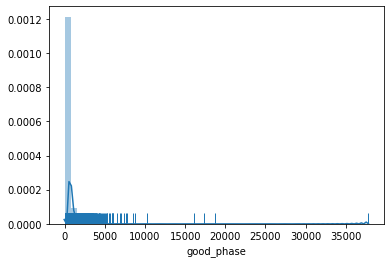

In [ ]:
sns.distplot(df2['good_phase'],rug=True)

## Filtering High value customers

In [ ]:
x = df2['good_phase'].quantile(0.7)

In [ ]:
df2 = df2[df2['good_phase']>=x]

In [ ]:
df2.shape

(30011, 180)

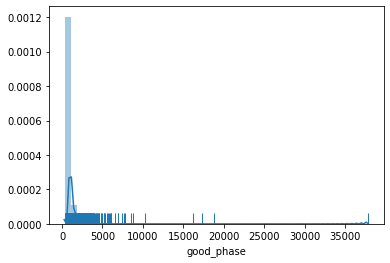

In [ ]:
sns.distplot(df2['good_phase'],rug=True)

In [ ]:
df2['good_phase'].describe()

count    30011.000000
mean       696.664356
std        488.782088
min        368.500000
25%        450.000000
50%        568.500000
75%        795.500000
max      37762.500000
Name: good_phase, dtype: float64

In [ ]:
x = df2['good_phase'].quantile(0.99)
x

2216.30000000001

In [ ]:
df2['good_phase'] = np.where(df2['good_phase']>x,x,df2['good_phase'])
df2.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(30011, 180)

In [ ]:
df2['good_phase'].describe(percentiles=[0,1])

count    30011.000000
mean       685.769911
std        347.616340
min        368.500000
0%         368.500000
50%        568.500000
100%      2216.300000
max       2216.300000
Name: good_phase, dtype: float64

Now defining churn based on 9th month.

In [ ]:
df2.drop(columns=['total_rech_amt_6','total_rech_amt_7'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.churn.mean()

0.08640165272733331

From above we can see that we have only 8 percent churn from the high value customers.So this is class imbalance dataset.

Lets drop all columns of 9 th month since these are the churn column and we have predicted churn based on these columns and we dont require the columns

In [ ]:
x=[]
for x1 in df2.columns:
  if '_9' in x1 or 'sep' in x1:
        x.append(x1)
x        

    

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'sep_vbc_3g']

In [ ]:
len(x)

44

In [ ]:
df2.drop(columns=x,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.shape

(30011, 134)

In [ ]:
x=[]
for x1 in df2.columns:
  if '_6' in x1 or '_7' in x1 :
        x.append(x1)
x


['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 

In [ ]:
len(x)

82

In [ ]:
print(x.pop())
print(x.pop())

std_ic_t2o_mou_6_7
std_og_t2c_mou_6_7


In [ ]:
len(x)

80

## Combining all similar columns of 6 and 7 months as they belong to good phase and getting derived metrics

In [ ]:
print('dcbhd'+'_9')

dcbhd_9


In [ ]:
for i in range(0,len(x),2):
  df2[x[i]+'_7']=(df2[x[i]]+df2[x[i+1]])/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.shape

(30011, 174)

In [ ]:
df2.drop(columns=x,inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.to_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/df2co.csv',index=False)

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/df2co.csv')

In [ ]:
df2.shape

(30011, 94)

In [ ]:
df2.shape

(30011, 94)

In [ ]:
x1 = [x for x in df2.columns if df2[x].nunique()<200]

In [ ]:
len(x1)

24

In [ ]:
for x in df2[x1].columns:
     print(x,df2[x].nunique(),'unique values',df2[x].unique(),df2[x].isna().mean())

loc_og_t2o_mou 2 unique values [0. 1.] 0.0
std_og_t2o_mou 2 unique values [0. 1.] 0.0
loc_ic_t2o_mou 2 unique values [0. 1.] 0.0
std_og_t2c_mou_8 2 unique values [0. 1.] 0.0
og_others_8 143 unique values [0.0000e+00 3.9760e+01 6.3000e-01 2.8100e+00 8.5800e+00 6.0000e-02
 8.1000e-01 1.8100e+00 1.0600e+00 5.4300e+00 1.3610e+01 3.7210e+01
 2.3000e-01 2.7100e+00 1.7300e+00 3.3000e-01 9.8400e+00 4.8000e-01
 2.1000e-01 1.0166e+02 1.1500e+00 7.1000e-01 4.6500e+00 1.6000e-02
 2.2600e+00 3.3300e+00 1.7600e+00 4.1000e-01 1.0300e+00 9.4900e+00
 3.0000e-01 2.6000e-01 2.8000e-01 1.6450e+01 1.8980e+00 3.8000e-01
 6.8600e+00 7.8000e-01 6.5000e-01 5.0000e-02 2.0000e-01 4.5800e+00
 1.0800e+00 1.6800e+00 1.0000e-01 1.8000e-01 1.6000e-01 1.0000e+00
 6.9300e+00 2.3000e-01 1.5160e+01 6.7000e+00 3.0400e+00 1.6630e+01
 4.1800e+00 1.3590e+01 8.8000e-01 4.4800e+00 6.6000e-01 2.4100e+00
 2.0400e+00 3.5000e-01 2.0500e+00 2.4800e+00 4.3510e+01 4.3600e+00
 4.0000e-01 1.1500e+01 1.3300e+00 6.0800e-01 4.5200e-01 6.3

In [ ]:
def box_plot(x,data):
    plt.figure(figsize=(25,200))
    for var in x:
        plt.subplot(50,2,x.index(var)+1)
        sns.boxplot(data[x])
        plt.xticks(rotation=90,labels=None)
        plt.title(var)
    plt.show()

In [ ]:
cont = [x for x in df2.columns if df2[x].nunique()>200]

In [ ]:
len(cont)

70

In [ ]:
df2.shape

(30011, 94)

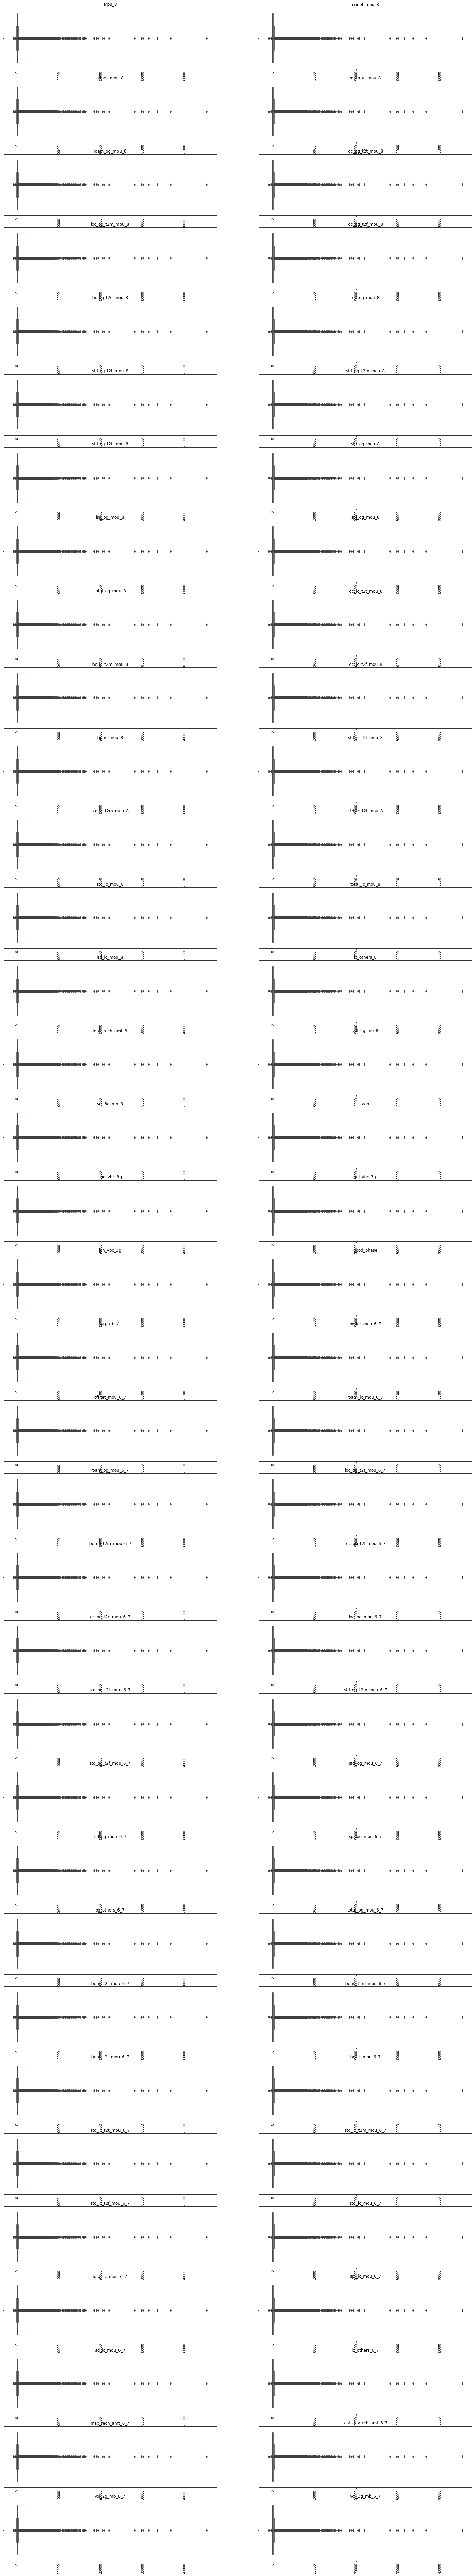

In [ ]:
box_plot(cont,df2)

In [ ]:
df2['aug_vbc_3g'].describe(percentiles=[0,0.95,0.99])

count    30011.000000
mean       129.439626
std        390.478591
min          0.000000
0%           0.000000
50%          0.000000
95%        818.750000
99%       1822.115000
max      12916.220000
Name: aug_vbc_3g, dtype: float64

### From Above box plots we saw that every column has outliers so lets cap the outliers to 99 percent.

In [ ]:
cat = [x for x in df2.columns if x not in cont]

In [ ]:
len(cat)

24

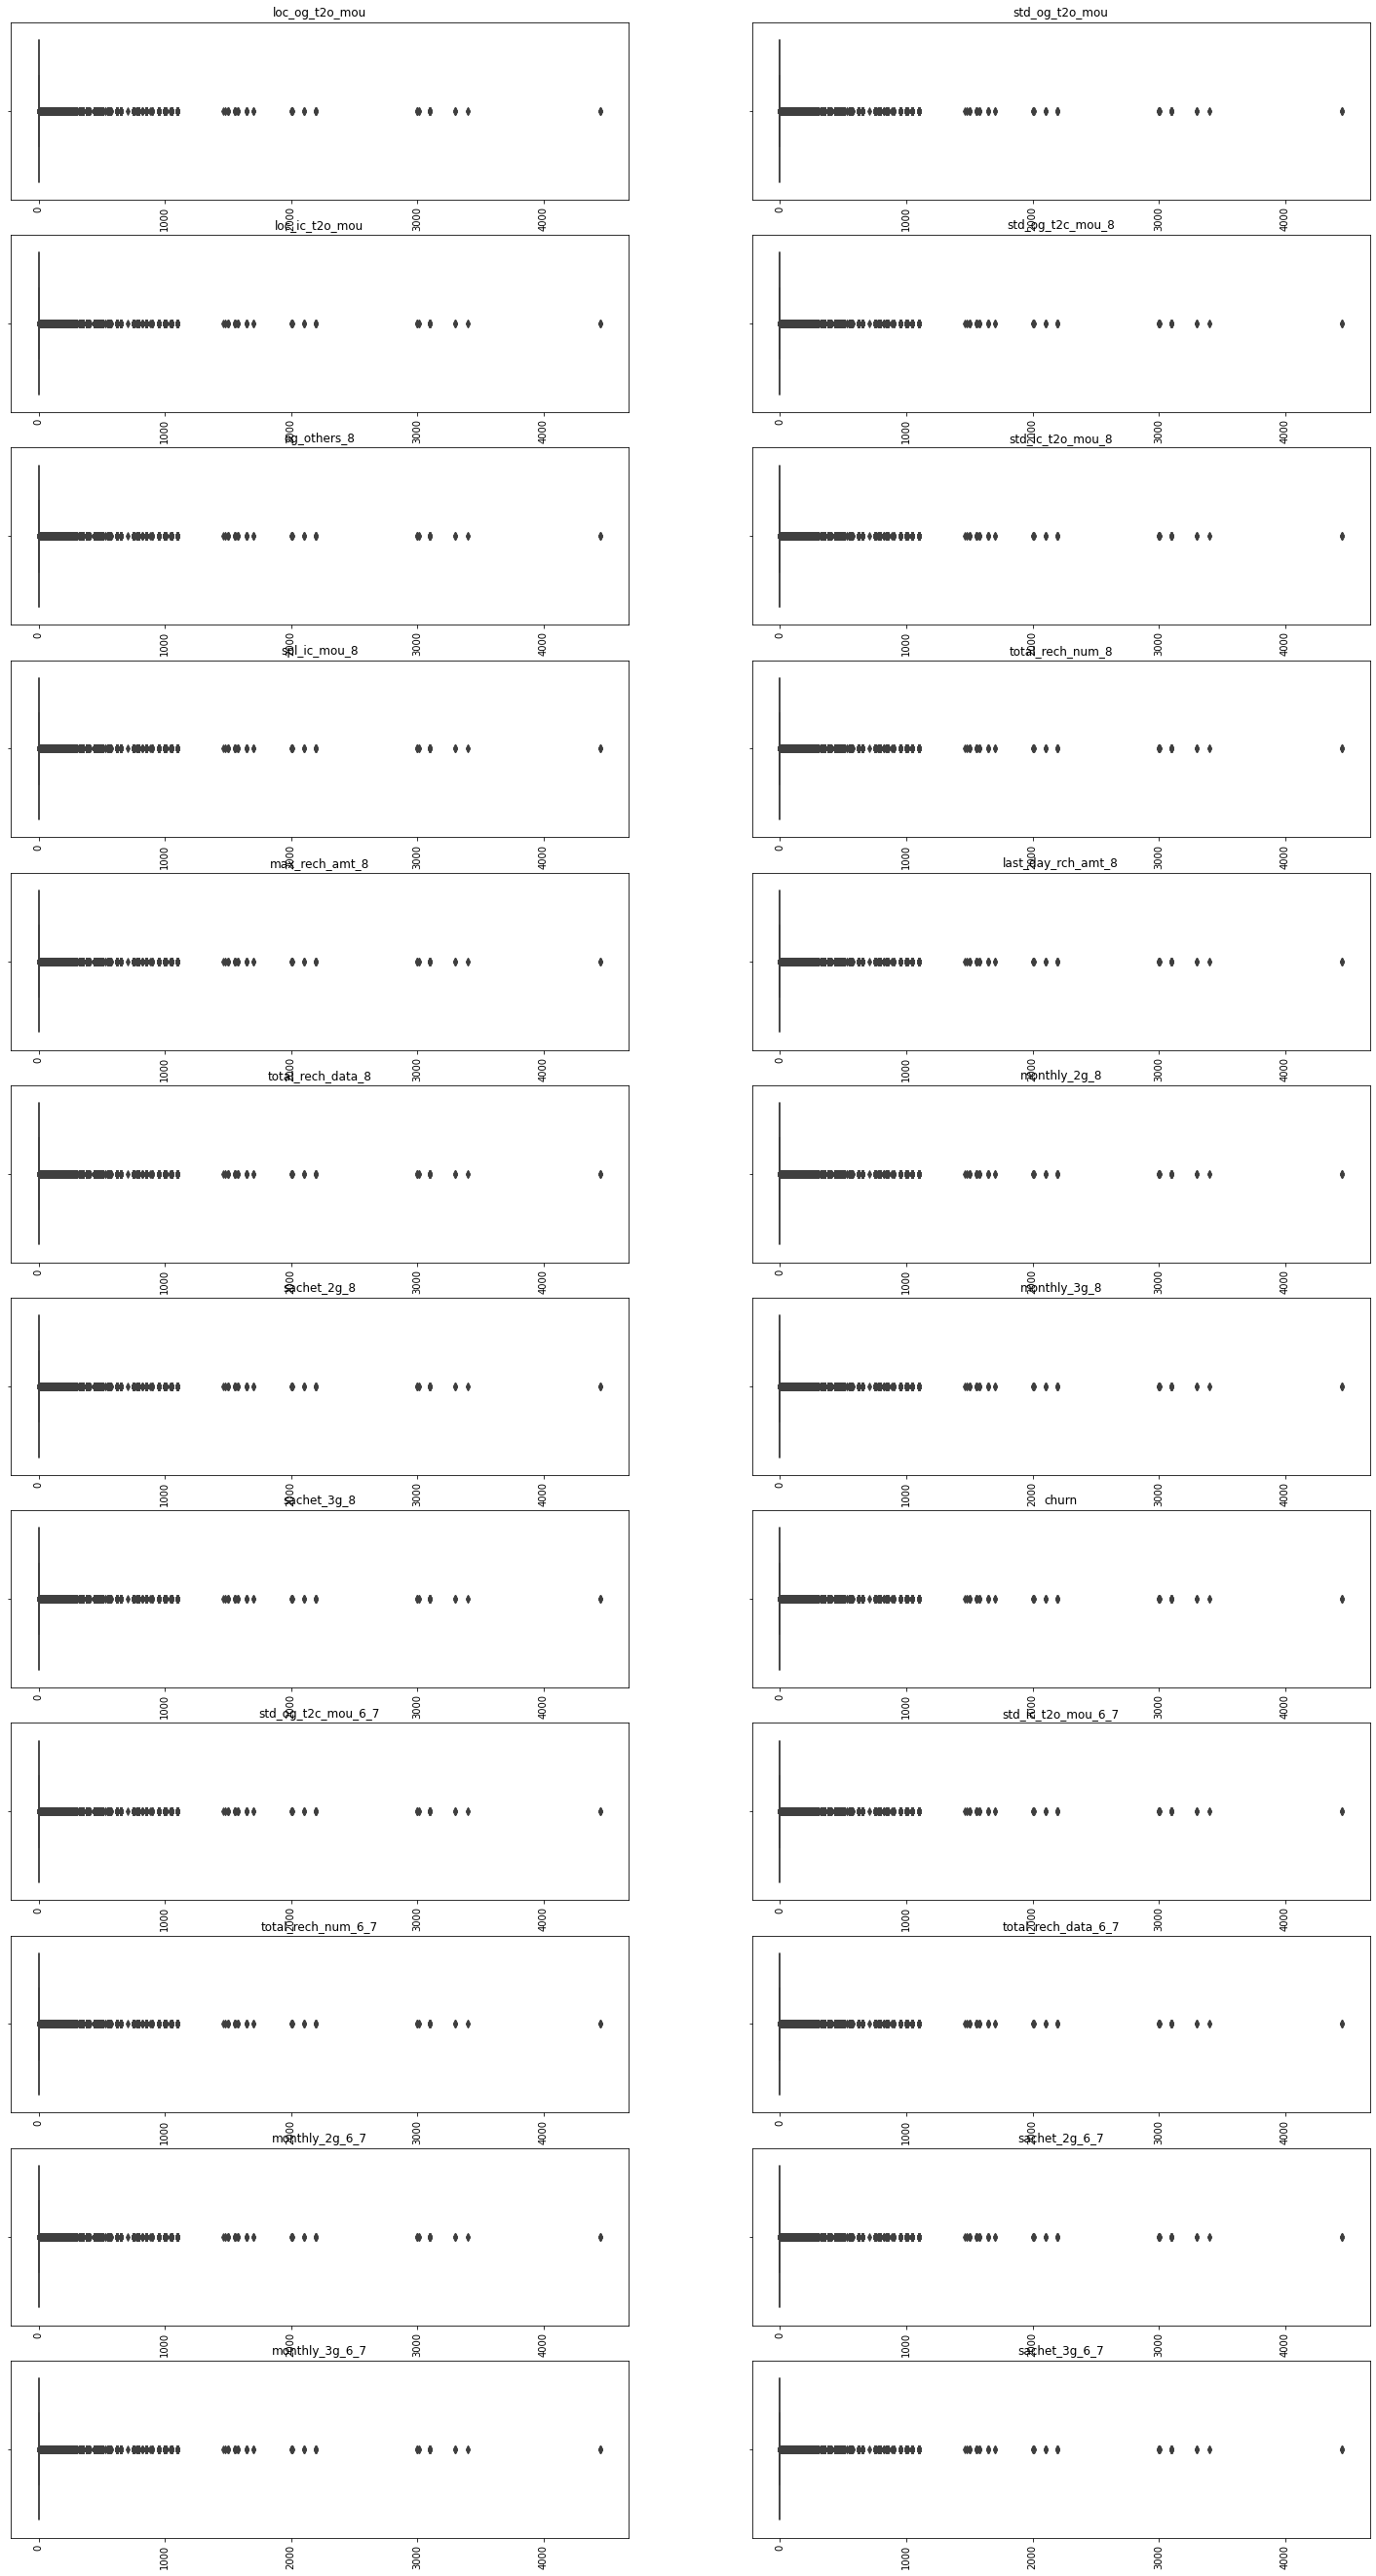

In [ ]:
box_plot(cat,df2)

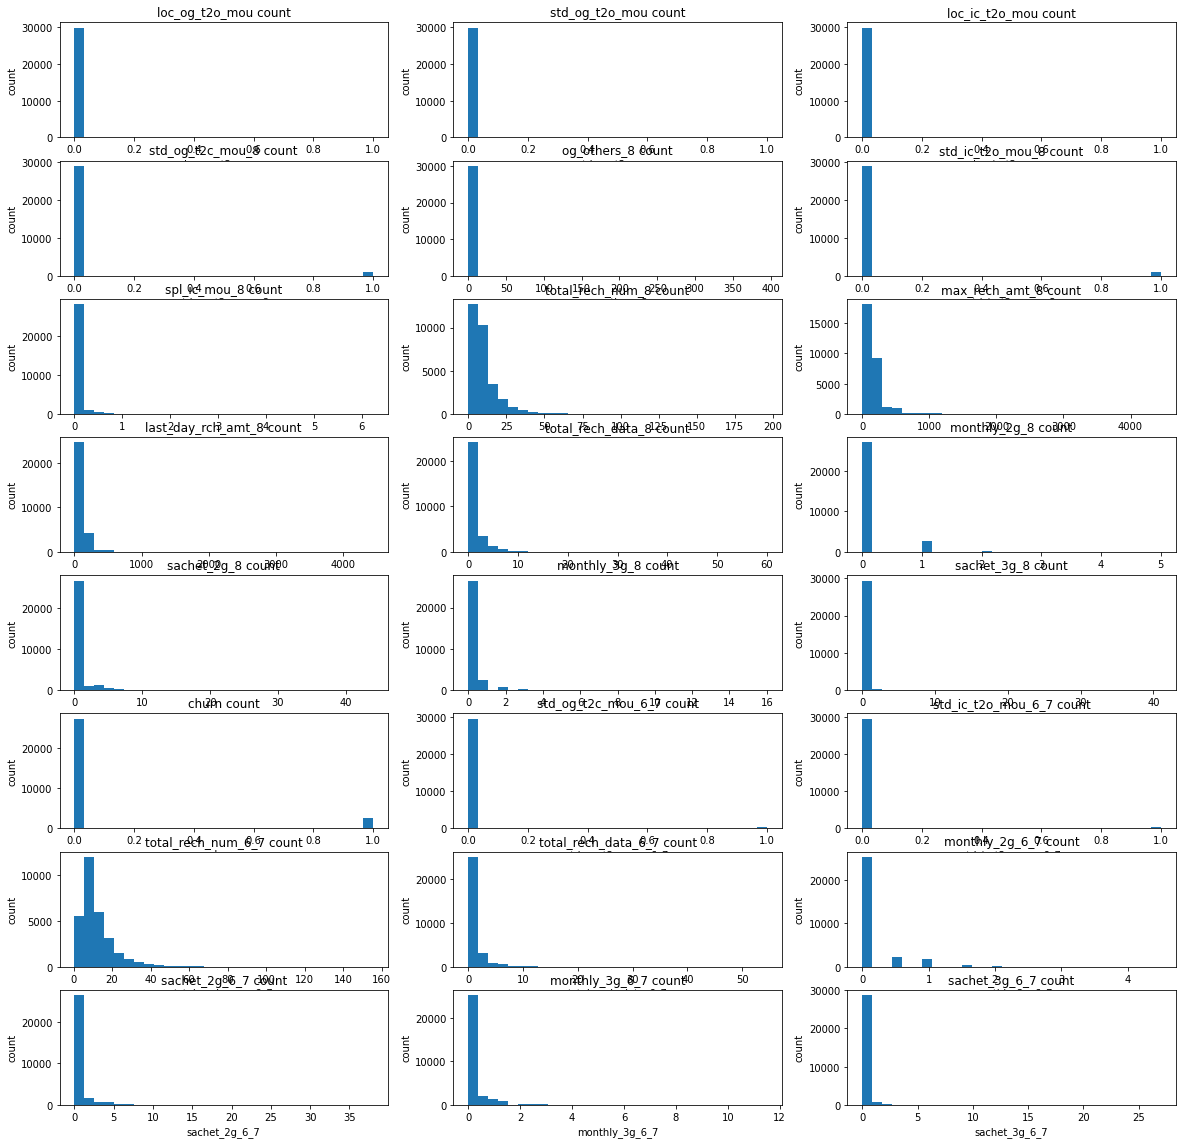

In [ ]:
plt.figure(figsize=(20,25))
for feature in cat:
    plt.subplot(10,3,(cat.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df2)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

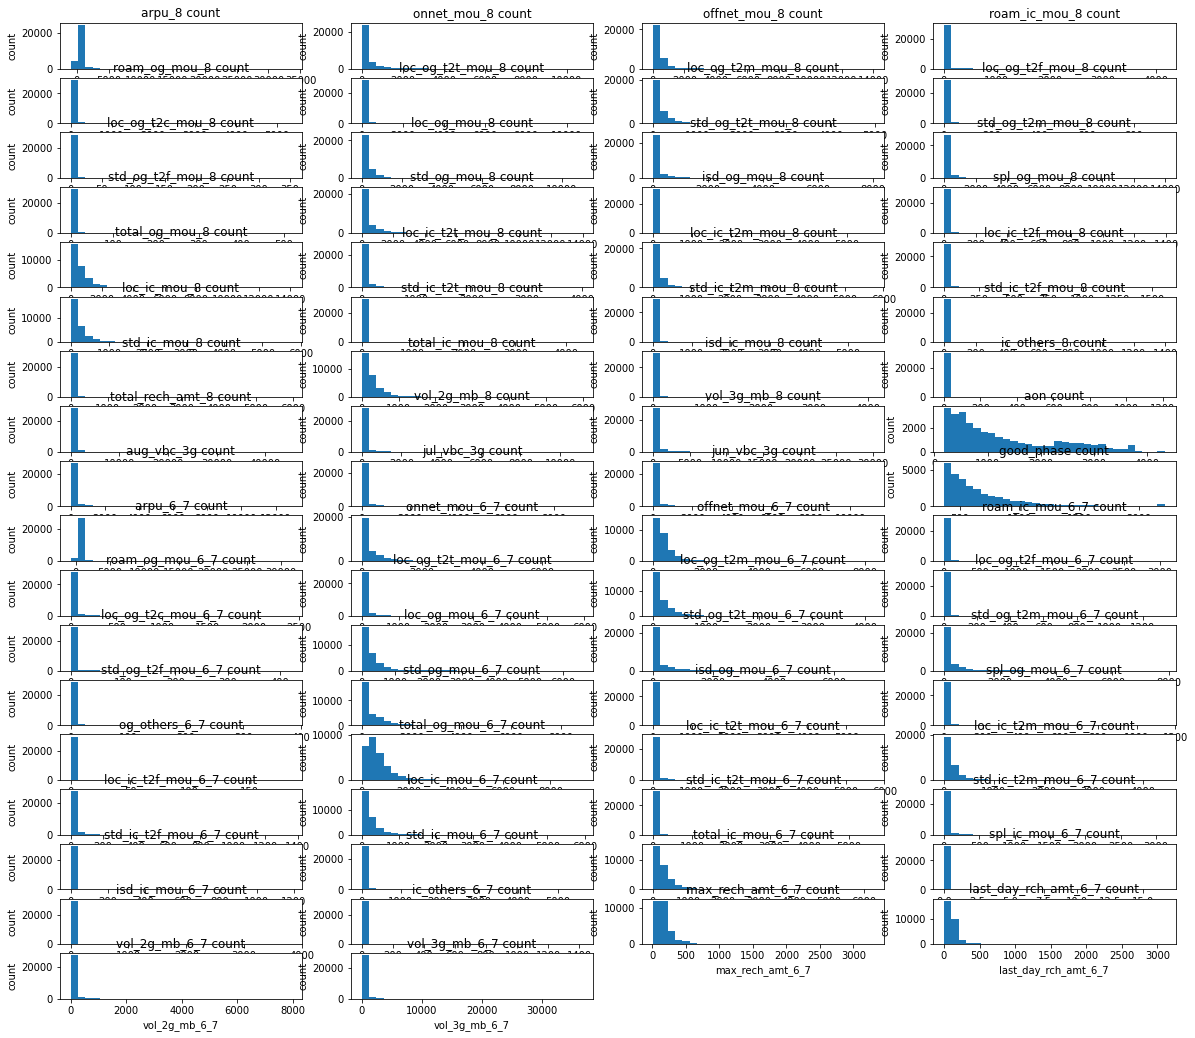

In [ ]:
plt.figure(figsize=(20,25))
for feature in cont:
    plt.subplot(25,4,(cont.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df2)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

### From the above plots we can see that majority of the data is not normally distributed so we can cap the outliers to 99 percent

In [ ]:
for x in cont:
  a=df2[x].quantile(0.99)
  df2[x] = np.where(df2[x]>a,a,df2[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


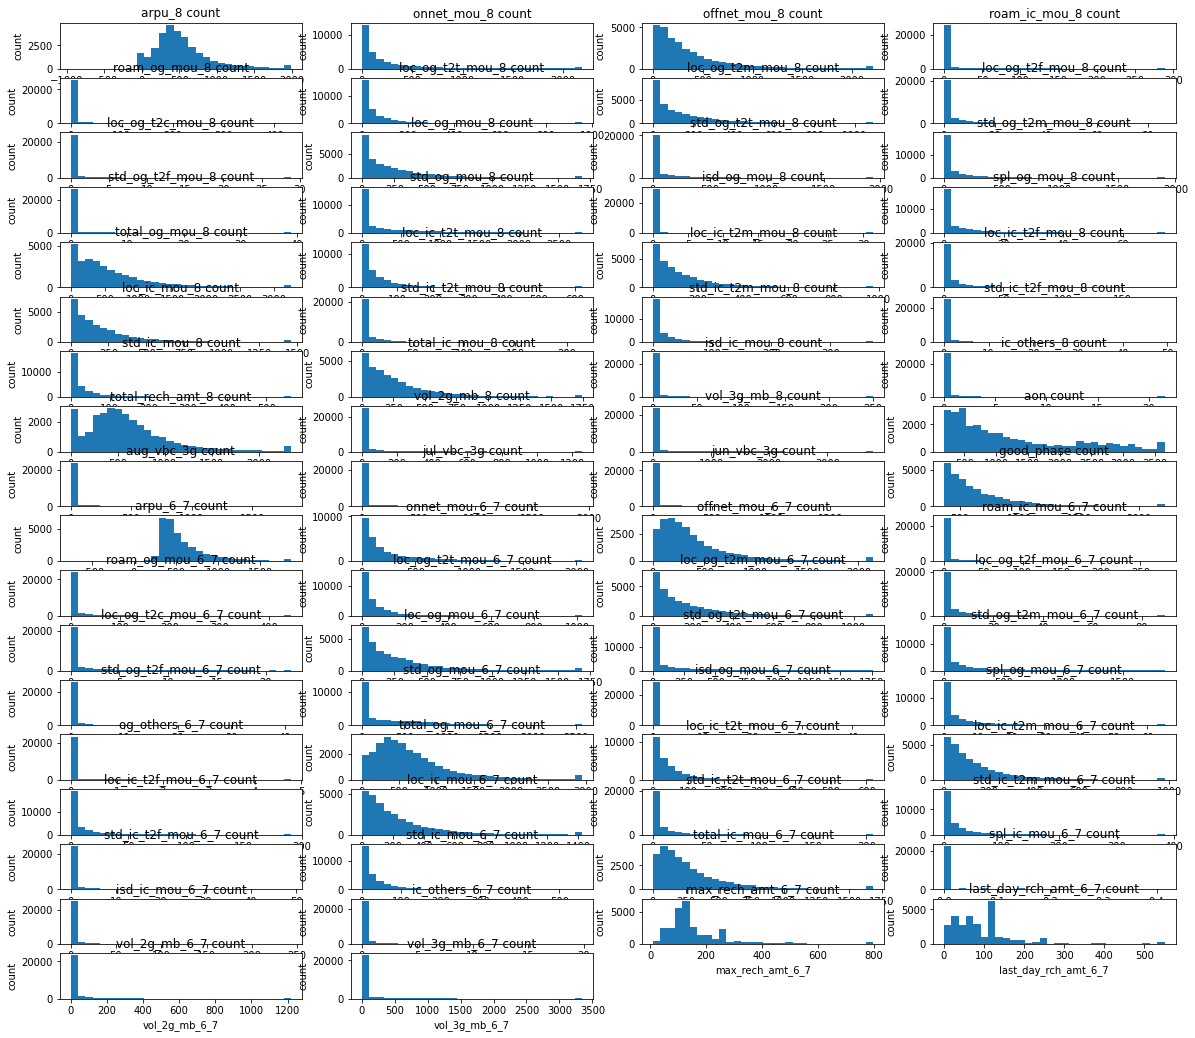

In [ ]:
plt.figure(figsize=(20,25))
for feature in cont:
    plt.subplot(25,4,(cont.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df2)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

In [ ]:
df2.churn.value_counts()

0.0    27418
1.0     2593
Name: churn, dtype: int64

In [ ]:
cont = [x for x in df2.columns if df2[x].nunique()>200]

In [ ]:

for x in cont:
  df2[x]= np.where(df2[x]==0,1,df2[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for x in cont:
  df2[x] = np.log(df2[x])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
null = [x for x in df2.columns if df2[x].isnull().any()]
null

['arpu_8', 'arpu_6_7']

In [ ]:
#### df2[['arpu_6','arpu_7','arpu_8','churn']].loc[df2[df2['arpu_6']<0].index | df2[df2['arpu_7']<0].index | df2[df2['arpu_8']<0].index ].churn.value_counts()

In [ ]:
df2.drop(columns=null,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


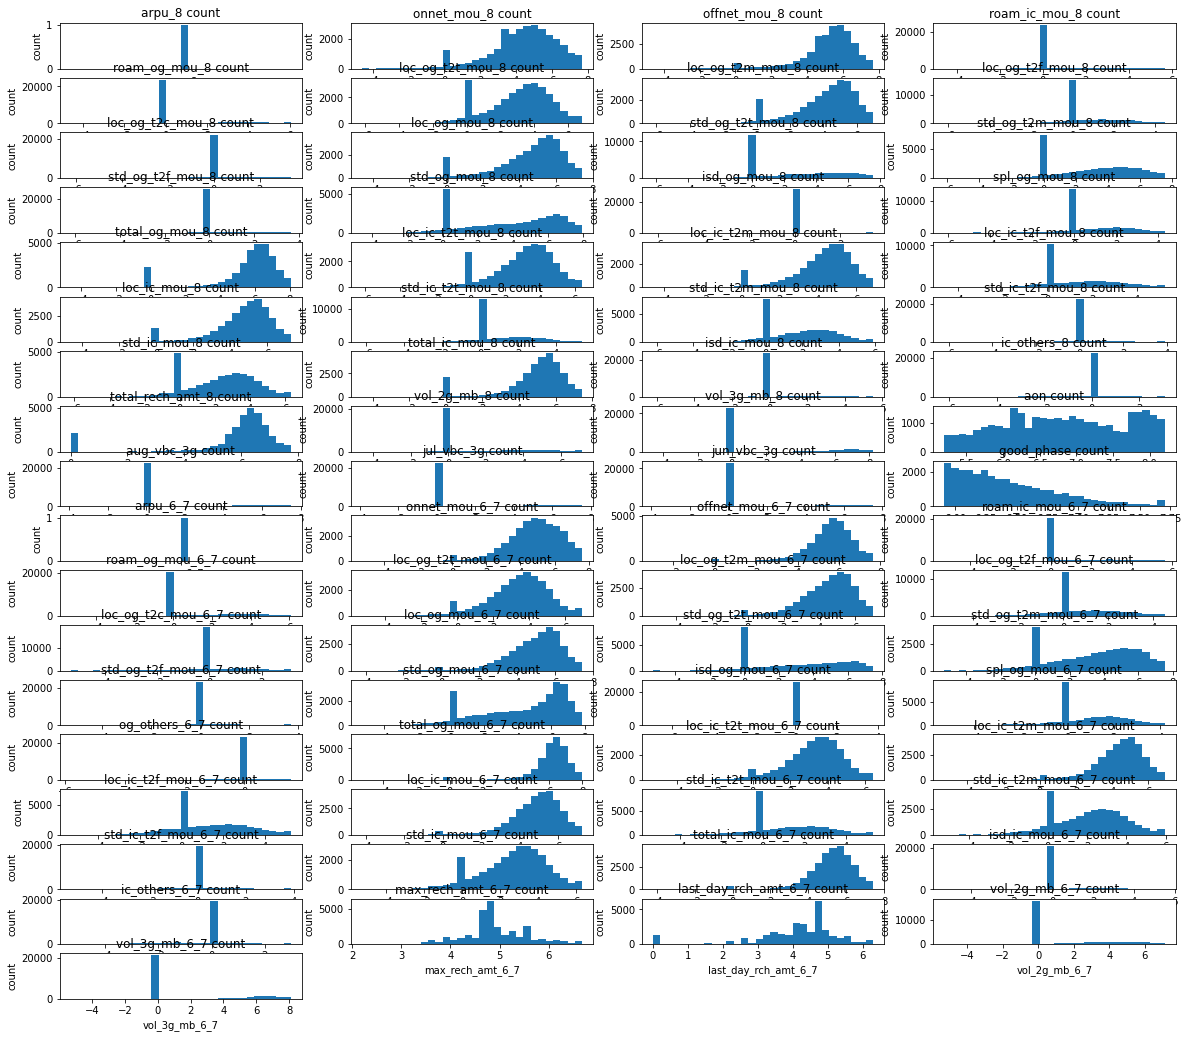

In [ ]:
plt.figure(figsize=(20,25))
for feature in cont:
    plt.subplot(25,4,(cont.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df2)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,auc,precision_recall_curve


In [ ]:
cat = [x for x in df2.columns if df2[x].nunique()<36]
for feature in cat:
  print(feature,":",df2[feature].nunique())

loc_og_t2o_mou : 2
std_og_t2o_mou : 2
loc_ic_t2o_mou : 2
std_og_t2c_mou_8 : 2
std_ic_t2o_mou_8 : 2
monthly_2g_8 : 6
sachet_2g_8 : 34
monthly_3g_8 : 12
sachet_3g_8 : 29
churn : 2
std_og_t2c_mou_6_7 : 2
std_ic_t2o_mou_6_7 : 2
monthly_2g_6_7 : 9
monthly_3g_6_7 : 20


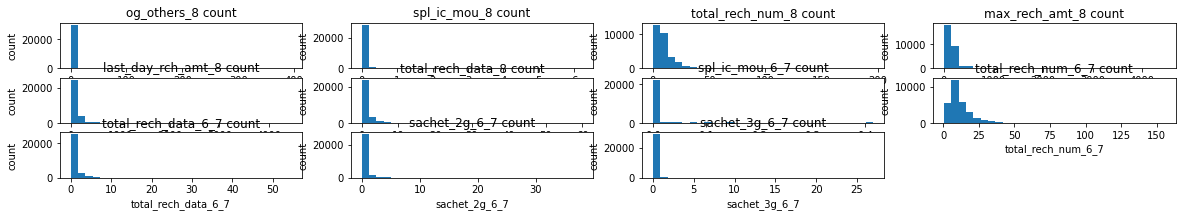

In [ ]:
cat1 =[x for x in df2.columns if df2[x].nunique()>35 and x not in cont]
plt.figure(figsize=(20,25))
for feature in cat1:
    plt.subplot(25,4,(cat1.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df2)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

In [ ]:
df2.to_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/dfclean.csv',index=False)

In [ ]:
df2 = pd.read_csv('dfclean.csv')

In [ ]:
dfclean = df2.copy()

In [ ]:
y=pd.DataFrame(df2.pop('churn'))

In [ ]:
y

,churn
7,1.0
8,0.0
13,0.0
16,0.0
17,0.0
...,...
99970,0.0
99974,0.0
99986,0.0
99988,0.0


In [ ]:
X = df2

In [ ]:
X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7,good_phase,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,roam_og_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,loc_og_mou_6_7,std_og_t2t_mou_6_7,std_og_t2m_mou_6_7,std_og_t2f_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,og_others_6_7,total_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,loc_ic_mou_6_7,std_ic_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,spl_ic_mou_6_7,isd_ic_mou_6_7,ic_others_6_7,total_rech_num_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7
7,0.0,0.0,0.0,3.956805,5.786621,3.454422,3.639164,3.695855,5.089323,3.974622,0.000000,5.544357,2.485740,3.894673,2.81421,0.0,4.354655,2.303585,1.871802,0.0,5.858390,3.307253,4.797360,3.677060,5.236655,3.414114,4.951098,3.100543,0.0,5.267549,6.060851,0.0,3.452841,2.717340,7.0,7.758718,1580.0,779.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,6.687109,4.055950,2.964242,2.930660,0.0,0.0,7.077498,4.029984,6.234989,3.213260,2.899497,3.722918,5.934907,4.071332,0.000000,6.169684,2.624306,3.709295,2.593013,4.219508,-2.407946,0.810930,0.000000,6.306978,3.811097,5.391466,4.842690,5.970126,3.192942,4.693318,3.766188,5.175076,6.383929,0.105,2.115653,2.738579,5.0,6.683987,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,3.557631,4.916178,0.000000,0.000000,2.524928,3.922765,0.000000,1.967112,4.143769,3.117065,4.326646,0.00000,0.0,4.587821,0.000000,2.325325,0.0,5.144933,-1.171183,2.739549,0.000000,2.759377,-2.302585,-0.430783,0.000000,0.0,-0.287682,2.805782,0.0,0.000000,0.000000,14.0,4.787492,30.0,10.0,3.0,-3.506558,2.479894,0.0,3.0,0.0,0.0,5.752573,3.045950,6.814159,4.805332,0.0,0.0,6.251904,5.946363,4.473295,0.000000,0.000000,5.550476,4.327702,0.000000,0.000000,5.808548,4.828274,2.473593,0.000000,4.919032,0.000000,0.000000,0.000000,6.152754,2.823757,3.577389,0.000000,3.963286,-1.237874,2.584375,0.000000,2.606017,4.192303,0.000,0.000000,0.000000,20.0,4.804021,3.218876,1.0,5.181784,5.928192,0.5,0.5,0.0,0.0
13,0.0,0.0,0.0,6.280845,6.178898,4.278193,0.364643,3.583797,5.685143,3.157426,-0.713350,5.869269,6.211062,5.055864,0.00000,0.0,6.484910,0.254642,1.564441,0.0,6.922900,3.962336,5.273922,2.013569,5.542283,5.040712,5.761768,0.647103,0.0,6.162072,7.042749,0.0,5.522792,3.065258,11.0,6.575076,130.0,0.0,3.0,-3.912023,0.000000,0.0,3.0,0.0,0.0,7.865955,0.000000,0.000000,0.000000,0.0,0.0,5.940171,5.720558,5.584605,4.429447,3.073619,3.328985,4.597188,0.819780,0.000000,4.862870,5.584229,5.037926,0.000000,6.041100,0.000000,0.000000,0.000000,6.309464,3.630456,4.390801,0.877550,4.794509,4.343611,5.129662,0.000000,5.505128,6.346680,0.225,5.034970,2.989966,5.0,4.700480,4.382027,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,4.257172,5.092277,0.000000,0.000000,4.210348,4.854215,2.328253,0.000000,5.327536,1.172482,2.906354,0.00000,0.0,3.069447,0.000000,1.776646,0.0,5.452668,3.363496,5.011701,3.487681,5.355548,1.845300,4.303119,0.779325,0.0,4.412071,5.685143,0.0,-1.469676,0.000000,2.0,5.075174,130.0,130.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,6.236370,0.000000,0.896088,3.086030,0.0,0.0,6.129050,4.131319,5.572211,0.347130,2.182675,3.986852,5.345392,0.806476,0.000000

In [ ]:
scaler =  StandardScaler()

In [ ]:
X[X.columns] = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7,good_phase,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,roam_og_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,loc_og_mou_6_7,std_og_t2t_mou_6_7,std_og_t2m_mou_6_7,std_og_t2f_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,og_others_6_7,total_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,loc_ic_mou_6_7,std_ic_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,spl_ic_mou_6_7,isd_ic_mou_6_7,ic_others_6_7,total_rech_num_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7
7,-0.06175,-0.06175,-0.06175,-0.236165,0.376709,2.047191,1.824978,0.335772,0.549402,2.429305,-0.222989,0.537396,0.001987,0.366624,3.531113,-0.179621,0.216992,3.923561,0.741100,-0.01785,0.156264,0.166168,0.384666,1.504232,0.370959,1.449318,1.708092,3.124620,-0.179621,1.541806,0.690730,-0.242264,2.168692,3.122987,-0.340280,1.109605,8.210351,4.704367,-0.430446,-0.543700,-0.544202,-0.319253,-0.329433,-0.297129,-0.144058,-0.162015,1.080143,0.634840,0.680825,-0.127357,-0.127357,1.567746,-0.461727,0.589856,1.564753,1.056096,0.203572,1.014436,2.285048,-0.154543,0.874746,-0.097361,0.107917,2.789578,-0.024605,-2.958346,-0.020057,0.074389,0.153366,0.354766,0.733427,2.056933,0.836807,1.166278,1.465480,3.396534,1.416034,0.967690,0.735022,1.058918,2.722783,-0.803881,2.768071,-3.479297,-0.467227,-0.635849,-0.609684,-0.380466,-0.326001,-0.332394,-0.169072
8,-0.06175,-0.06175,-0.06175,-0.452381,-0.202670,-0.426841,-0.449305,-0.285062,-0.079606,-0.553891,1.904590,-0.210251,0.243132,0.540367,-0.236915,-0.179621,0.303720,-0.071705,1.061544,-0.01785,-0.205177,-2.442968,-0.867486,-0.741243,-1.133707,-1.958578,-1.190892,-0.250027,-0.179621,-1.389173,-1.165501,-0.242264,-0.372603,0.090475,0.398240,-0.563249,-0.769798,-0.589663,0.816878,-2.154065,0.338623,-0.319253,1.297101,-0.297129,-0.144058,-1.287775,0.674102,2.174745,1.455072,-0.127357,-0.127357,-0.449389,0.732957,-0.963369,-0.513912,-0.573189,1.294817,-0.067435,-0.508035,-0.154543,0.621367,0.730848,-0.400531,-0.189780,0.247912,-0.000007,-0.558581,0.074389,0.024868,-0.292428,-0.606473,-0.726560,-0.700411,-1.387477,0.296632,-0.192390,-0.033239,-0.830347,-0.458015,-0.326959,0.160840,0.914451,-0.190616,-0.788232,0.002127,1.579939,1.447476,1.104534,-0.026249,-0.332394,-0.169072
13,-0.06175,-0.06175,-0.06175,1.022669,0.637813,2.637170,-0.221423,0.276358,0.870668,1.815949,-0.994531,0.710837,1.424940,0.833664,-0.236915,-0.179621,1.009355,0.369938,0.523929,-0.01785,0.695550,0.547819,0.674648,0.488386,0.556593,2.418982,2.144765,0.454283,-0.179621,2.013762,1.250666,-0.242264,3.692179,3.511259,0.081731,0.443193,-0.190433,-0.658506,0.816878,-2.340272,-0.544202,-0.319253,1.297101,-0.297129,-0.144058,1.258047,-0.550430,-0.550810,-0.529549,-0.127357,-0.127357,-1.211031,0.592189,0.016435,2.351507,1.153939,-0.031648,0.113967,0.054364,-0.154543,-0.042135,1.014921,0.654602,-0.189780,0.685042,-0.000007,-0.558581,0.074389,0.155437,0.236357,-0.005677,-0.222160,-0.063704,1.829480,1.707316,-0.192390,1.602226,0.937131,2.098493,2.971242,2.957955,-0.803881,-0.353568,0.184193,-0.467227,-0.635849,-0.609684,-0.380466,-0.326001,-0.332394,-0.169

In [ ]:
pip install imblearn

## Handling the Class Imbalance in Data set using the SMOTE technique.

In [ ]:
from imblearn.over_sampling import  SMOTE
smote = SMOTE()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
Counter(y_train)


Counter({0.0: 19162, 1.0: 19162})

### Doing Dimensionality Reduction using PCA

In [ ]:
pca = PCA(0.99)

In [ ]:
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_train_pca

array([[ 0.45967665, -1.79869967,  3.38586183, ...,  0.52463064,
        -0.31917298, -0.08681897],
       [-4.12129619,  1.06563421, -0.40420561, ..., -0.13095877,
        -0.01729196,  0.05819342],
       [-3.77313235,  1.78690809,  1.69974704, ..., -0.22237228,
         0.41499909,  0.27337574],
       ...,
       [ 7.24607626, -2.49792475, -4.36565091, ..., -0.01624028,
         0.10084307, -0.25131657],
       [ 5.86582938, -4.63245531,  2.35486498, ...,  0.00888142,
        -0.1454086 ,  0.04866913],
       [ 4.78642156,  0.33957651, -5.70730321, ...,  0.34633399,
        -0.14115121,  0.43378219]])

In [ ]:
X_test_pca = pca.transform(X_test)

In [ ]:
X_test_pca

array([[-3.39012361,  1.14810735, -1.75129661, ..., -0.06427607,
         0.57278609, -0.0823708 ],
       [-6.78527066,  2.08257993, -2.21149959, ...,  0.4805633 ,
         0.13554953, -0.05106001],
       [ 5.61467676, -2.83385975,  5.39111975, ...,  0.40179807,
        -0.75272602,  0.76048646],
       ...,
       [-0.71909218, -0.87653506,  1.56142667, ...,  0.55983625,
         0.54579468,  0.06825969],
       [-2.76131151,  0.4952135 ,  0.95919731, ...,  0.03308408,
        -0.21225775, -0.18140573],
       [-6.10776351,  3.23284327, -1.98435442, ...,  0.09972324,
        -0.44973928,  0.0209825 ]])

In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(38324, 68)
(9004, 68)


# Model I.Logistic with PCA

In [ ]:
logreg = LogisticRegression(penalty='l2')

In [ ]:
logreg.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred_final = logreg.predict_proba(X_train_pca)[:,1]

In [ ]:

y_train_pred_final = pd.DataFrame(y_train_pred_final)


y_train_pred_final.rename(columns={0:'churn_prob'},inplace=True)

In [ ]:
y_train_pred_final['churn'] = y_train

In [ ]:
y_train_pred_final.churn_prob

0        0.380902
1        0.178195
2        0.008616
3        0.734183
4        0.817802
           ...   
38319    0.977336
38320    0.994435
38321    0.995678
38322    0.977767
38323    0.990960
Name: churn_prob, Length: 38324, dtype: float64

In [ ]:
y_train_pred_final[y_train_pred_final['churn']==0].tail(10)

,churn_prob,churn
20996,0.057580,0.0
20997,0.034820,0.0
20998,0.055385,0.0
20999,0.029940,0.0
21001,0.007428,0.0
21002,0.036005,0.0
21003,0.983497,0.0
21004,0.199285,0.0
21005,0.203856,0.0
21006,0.037639,0.0


In [ ]:
y_train_pred_final

,churn_prob,churn
0,0.380902,0.0
1,0.178195,0.0
2,0.008616,0.0
3,0.734183,1.0
4,0.817802,1.0
...,...,...
38319,0.977336,1.0
38320,0.994435,1.0
38321,0.995678,1.0
38322,0.977767,1.0


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

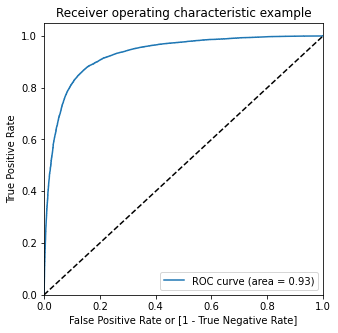

In [ ]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn_prob,churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.380902,0.0,1,1,1,1,0,0,0,0,0,0
1,0.178195,0.0,1,1,0,0,0,0,0,0,0,0
2,0.008616,0.0,1,0,0,0,0,0,0,0,0,0
3,0.734183,1.0,1,1,1,1,1,1,1,1,0,0
4,0.817802,1.0,1,1,1,1,1,1,1,1,1,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall','f1','r2'])
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    precision = precision_score(y_train_pred_final.churn,y_train_pred_final[i])
    
    recall = recall_score(y_train_pred_final.churn,y_train_pred_final[i])
    f1 = f1_score(y_train_pred_final.churn,y_train_pred_final[i])
    r2 = r2_score(y_train_pred_final.churn,y_train_pred_final[i])
    cutoff_df.loc[i] =[i,precision,recall,f1,r2]
print(cutoff_df)

     prob  precision    recall        f1        r2
0.0   0.0   0.500000  1.000000  0.666667 -1.000000
0.1   0.1   0.633882  0.984135  0.771099 -0.168563
0.2   0.2   0.727593  0.958303  0.827162  0.199040
0.3   0.3   0.798463  0.921720  0.855676  0.378144
0.4   0.4   0.847944  0.882371  0.864815  0.448283
0.5   0.5   0.878091  0.839370  0.858294  0.445674
0.6   0.6   0.902055  0.790158  0.842407  0.408726
0.7   0.7   0.919580  0.726229  0.811547  0.325436
0.8   0.8   0.935765  0.645444  0.763952  0.202275
0.9   0.9   0.951660  0.524997  0.676689 -0.003340


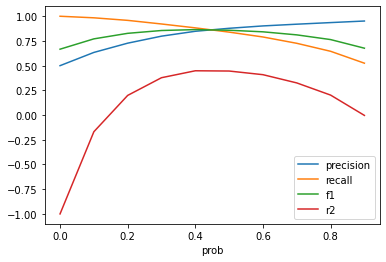

In [ ]:
cutoff_df.plot.line(x='prob', y=['precision','recall','f1','r2'])
plt.show()

In [ ]:
y_test_pred = pd.DataFrame(logreg.predict_proba(X_test_pca)[:,1],index=y_test.index,columns=['churn_prob'])

In [ ]:
y_test_pred

,churn_prob
91092,0.111246
81929,0.056223
17949,0.623842
84087,0.462340
73283,0.161346
...,...
4291,0.451603
88014,0.835586
84814,0.391028
32239,0.225054


In [ ]:
y_test_pred['churn'] = y_test_pred.churn_prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_test_pred

,churn_prob,churn
91092,0.111246,0
81929,0.056223,0
17949,0.623842,1
84087,0.462340,1
73283,0.161346,0
...,...,...
4291,0.451603,1
88014,0.835586,1
84814,0.391028,0
32239,0.225054,0


In [ ]:
print(classification_report(y_test,y_test_pred.churn))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      8256
         1.0       0.32      0.84      0.47       748

    accuracy                           0.84      9004
   macro avg       0.65      0.84      0.69      9004
weighted avg       0.93      0.84      0.87      9004



### Hyper Parameter tuning using Grid search CV

In [ ]:

from sklearn.model_selection import GridSearchCV

In [ ]:
logreg1 = LogisticRegression(class_weight={0:1,1:1.5},penalty='l2')

In [ ]:

params = {'C':[0.015,0.030,0.060,0.1,0.15,0.2,0.5,1]}




# cross validation
folds = 3
model_cv = GridSearchCV(estimator = logreg1, 
                        param_grid = params, 
                        scoring= 'recall',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_pca,np.ravel(y_train))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 1.5},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.015, 0.03, 0.06, 0.1, 0.15, 0.2, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [ ]:
model_cv.best_score_

0.8797100105859071

In [ ]:
model_cv.best_params_

{'C': 0.03}

In [ ]:
import sklearn

In [ ]:
y_test_pred1 = model_cv.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      8256
         1.0       0.33      0.84      0.47       748

    accuracy                           0.84      9004
   macro avg       0.65      0.84      0.69      9004
weighted avg       0.93      0.84      0.87      9004



In [ ]:
confusion_matrix(y_test,y_test_pred1)

array([[6952, 1304],
       [ 119,  629]])

In [ ]:
recall_score(y_test,y_test_pred1)

0.8409090909090909

# Model II - Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
dt_classifier = DecisionTreeClassifier(min_samples_split=20,random_state=10,class_weight={0:1,1:5})

In [ ]:
params1 = {'criterion': ['gini','entropy'],'min_samples_leaf':[1,5,8,10],'max_depth':[7,10,13,15]}




# cross validation
folds = 3
model_cv_dt = GridSearchCV(estimator = dt_classifier, 
                        param_grid = params1, 
                        scoring= 'f1',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                           n_jobs=-1
                          )            
model_cv_dt.fit(X_train_pca,np.ravel(y_train))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 5},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'c

In [ ]:
?DecisionTreeClassifier

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
model_cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1}

In [ ]:
y_test_pred_dt = model_cv_dt.predict(X_test_pca)


In [ ]:
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      8256
         1.0       0.24      0.68      0.36       748

    accuracy                           0.80      9004
   macro avg       0.60      0.74      0.62      9004
weighted avg       0.91      0.80      0.83      9004



In [ ]:
confusion_matrix(y_test,y_test_pred_dt)

array([[6650, 1606],
       [ 238,  510]])

In [ ]:
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      8256
         1.0       0.24      0.68      0.36       748

    accuracy                           0.80      9004
   macro avg       0.60      0.74      0.62      9004
weighted avg       0.91      0.80      0.83      9004



In [ ]:
model_cv_dt.best_score_

0.8818473628959573

# Model III - Random Forest with PCA

In [ ]:
random_forest =  RandomForestClassifier(n_estimators=15,max_depth=7,n_jobs=-1,max_leaf_nodes=30,class_weight={0:3,1:10},min_samples_leaf=15,oob_score=True,criterion='entropy')

In [ ]:
random_forest.fit(X_train_pca,np.ravel(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 3, 1: 10}, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=30,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=15, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test_pred_random=random_forest.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_test_pred_random))

              precision    recall  f1-score   support

         0.0       0.99      0.53      0.69      8256
         1.0       0.15      0.92      0.26       748

    accuracy                           0.56      9004
   macro avg       0.57      0.72      0.47      9004
weighted avg       0.92      0.56      0.65      9004



In [ ]:
params1 = {'criterion': ['gini','entropy'],'min_samples_leaf':[1,5,8,10],'max_depth':[7,10,13,15]}




# cross validation
folds = 2
model_cv_rf = GridSearchCV(estimator = random_forest, 
                        param_grid = params1, 
                        scoring= 'f1',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_rf.fit(X_train_pca,np.ravel(y_train)) 

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523:

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 3, 1: 10},
                                              criterion='entropy', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=30,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=15,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=-1,
                                              oob_score=True, random_state=None,
                            

In [ ]:
y_test_rf = model_cv_rf.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.61      0.76      8256
         1.0       0.17      0.90      0.29       748

    accuracy                           0.64      9004
   macro avg       0.58      0.76      0.52      9004
weighted avg       0.92      0.64      0.72      9004



In [ ]:
model_cv_rf.best_params_

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 8}

### Lets Do ensemble manually for the outputs obtained from the 3 models.

In [ ]:
import statistics

In [ ]:
final_pred = np.array([])
for i in range(0,len(y_test_pred1)):
    final_pred = np.append(final_pred, statistics.mode([y_test_pred1[i], y_test_pred_dt[i], y_test_rf[i]]))

In [ ]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88      8256
         1.0       0.27      0.86      0.41       748

    accuracy                           0.80      9004
   macro avg       0.63      0.82      0.64      9004
weighted avg       0.92      0.80      0.84      9004



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf')

In [ ]:
svc.fit(X_train_pca,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc = svc.predict(X_test_pca)

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      8256
         1.0       0.48      0.71      0.57       748

    accuracy                           0.91      9004
   macro avg       0.72      0.82      0.76      9004
weighted avg       0.93      0.91      0.92      9004



In [ ]:
hyper_params = [ {
                'kernel': ['rbf','linear','poly','sigmoid'] } ]


# specify model
model = SVC()

# set up GridSearchCV()
model_cv_svc = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'f1', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_svc.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 21.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [ ]:
?SVC

In [ ]:
model_cv_svc.best_score_

0.5742581059551979

In [ ]:
model_cv_svc.best_params_

{'C': 10, 'gamma': 0.01}

In [ ]:
y_test_pred_svc = model_cv_svc.predict(X_test_pca)

In [ ]:
X_test_pca.shape

(9004, 69)

In [ ]:
classification_report()

# Interpretable model without PCA
# Logistic regression

In [ ]:
# dfI = pd.read_csv('/content/drive/My Drive/ML AI CASE STUDY WITH PCA/dfclean.csv')

In [ ]:
dfI = dfclean.copy()

In [ ]:
dfI

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7,good_phase,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,roam_og_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,loc_og_mou_6_7,std_og_t2t_mou_6_7,std_og_t2m_mou_6_7,std_og_t2f_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,og_others_6_7,total_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,loc_ic_mou_6_7,std_ic_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,spl_ic_mou_6_7,isd_ic_mou_6_7,ic_others_6_7,total_rech_num_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7
0,0.0,0.0,0.0,3.956805,5.786621,3.454422,3.639164,3.695855,5.089323,3.974622,0.000000,5.544357,2.485740,3.894673,2.81421,0.0,4.354655,2.303585,1.871802,0.0,5.858390,3.307253,4.797360,3.677060,5.236655,3.414114,4.951098,3.100543,0.0,5.267549,6.060851,0.0,3.452841,2.717340,7.0,7.758718,1580.0,779.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,6.687109,4.055950,2.964242,2.930660,1.0,0.0,0.0,7.077498,4.029984,6.234989,3.213260,2.899497,3.722918,5.934907,4.071332,0.000000,6.169684,2.624306,3.709295,2.593013,4.219508,-2.407946,0.810930,0.000000,6.306978,3.811097,5.391466,4.842690,5.970126,3.192942,4.693318,3.766188,5.175076,6.383929,0.105,2.115653,2.738579,5.0,6.683987,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,3.557631,4.916178,0.000000,0.000000,2.524928,3.922765,0.000000,1.967112,4.143769,3.117065,4.326646,0.00000,0.0,4.587821,0.000000,2.325325,0.0,5.144933,-1.171183,2.739549,0.000000,2.759377,-2.302585,-0.430783,0.000000,0.0,-0.287682,2.805782,0.0,0.000000,0.000000,14.0,4.787492,30.0,10.0,3.0,-3.506558,2.479894,0.0,3.0,0.0,0.0,5.752573,3.045950,6.814159,4.805332,0.0,0.0,0.0,6.251904,5.946363,4.473295,0.000000,0.000000,5.550476,4.327702,0.000000,0.000000,5.808548,4.828274,2.473593,0.000000,4.919032,0.000000,0.000000,0.000000,6.152754,2.823757,3.577389,0.000000,3.963286,-1.237874,2.584375,0.000000,2.606017,4.192303,0.000,0.000000,0.000000,20.0,4.804021,3.218876,1.0,5.181784,5.928192,0.5,0.5,0.0,0.0
2,0.0,0.0,0.0,6.280845,6.178898,4.278193,0.364643,3.583797,5.685143,3.157426,-0.713350,5.869269,6.211062,5.055864,0.00000,0.0,6.484910,0.254642,1.564441,0.0,6.922900,3.962336,5.273922,2.013569,5.542283,5.040712,5.761768,0.647103,0.0,6.162072,7.042749,0.0,5.522792,3.065258,11.0,6.575076,130.0,0.0,3.0,-3.912023,0.000000,0.0,3.0,0.0,0.0,7.865955,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.940171,5.720558,5.584605,4.429447,3.073619,3.328985,4.597188,0.819780,0.000000,4.862870,5.584229,5.037926,0.000000,6.041100,0.000000,0.000000,0.000000,6.309464,3.630456,4.390801,0.877550,4.794509,4.343611,5.129662,0.000000,5.505128,6.346680,0.225,5.034970,2.989966,5.0,4.700480,4.382027,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.257172,5.092277,0.000000,0.000000,4.210348,4.854215,2.328253,0.000000,5.327536,1.172482,2.906354,0.00000,0.0,3.069447,0.000000,1.776646,0.0,5.452668,3.363496,5.011701,3.487681,5.355548,1.845300,4.303119,0.779325,0.0,4.412071,5.685143,0.0,-1.469676,0.000000,2.0,5.075174,130.0,130.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,6.236370,0.000000,0.896088,3.086030,0.0,0.0,0.0,6.129050,4.131319,5.572211,0.347130,2.182675,3.986852,5.3453

In [ ]:
for x in dfI.columns:
    print(x,dfI[x].nunique(),dfI[x].unique())

loc_og_t2o_mou 2 [0. 1.]
std_og_t2o_mou 2 [0. 1.]
loc_ic_t2o_mou 2 [0. 1.]
onnet_mou_8 17303 [3.95680515 3.55763117 6.28084518 ... 5.52907188 4.15747584 6.65339192]
offnet_mou_8 21213 [5.78662127 4.91617808 6.17889802 ... 4.88665811 6.92828313 6.38930063]
roam_ic_mou_8 3900 [3.45442214 0.         4.27819273 ... 4.48874872 4.99063665 4.3430259 ]
roam_og_mou_8 4625 [3.63916386 0.         0.36464311 ... 4.74484517 5.23329873 3.68487143]
loc_og_t2t_mou_8 11079 [3.69585507 2.52492832 3.58379668 ... 4.88537437 6.00719025 6.57724921]
loc_og_t2m_mou_8 16577 [5.08932324 3.9227651  5.68514317 ... 4.7509142  4.09167433 6.20148233]
loc_og_t2f_mou_8 3142 [3.97462215 0.         3.15742586 ... 4.24290824 1.54841321 2.43798973]
loc_og_t2c_mou_8 1737 [ 0.          1.96711236 -0.71334989 ...  1.87456758  3.22922212
  3.03735395]
loc_og_mou_8 19312 [5.5443568  4.14376945 5.86926866 ... 5.42631472 5.28872147 7.1107451 ]
std_og_t2t_mou_8 11972 [2.48573964 3.11706456 6.21106182 ... 5.47105144 3.03399099 4.0

In [ ]:
cat = [x for x in dfI.columns if dfI[x].nunique()<=15]

In [ ]:
cont = [x for x in dfI.columns if dfI[x].nunique()>15]

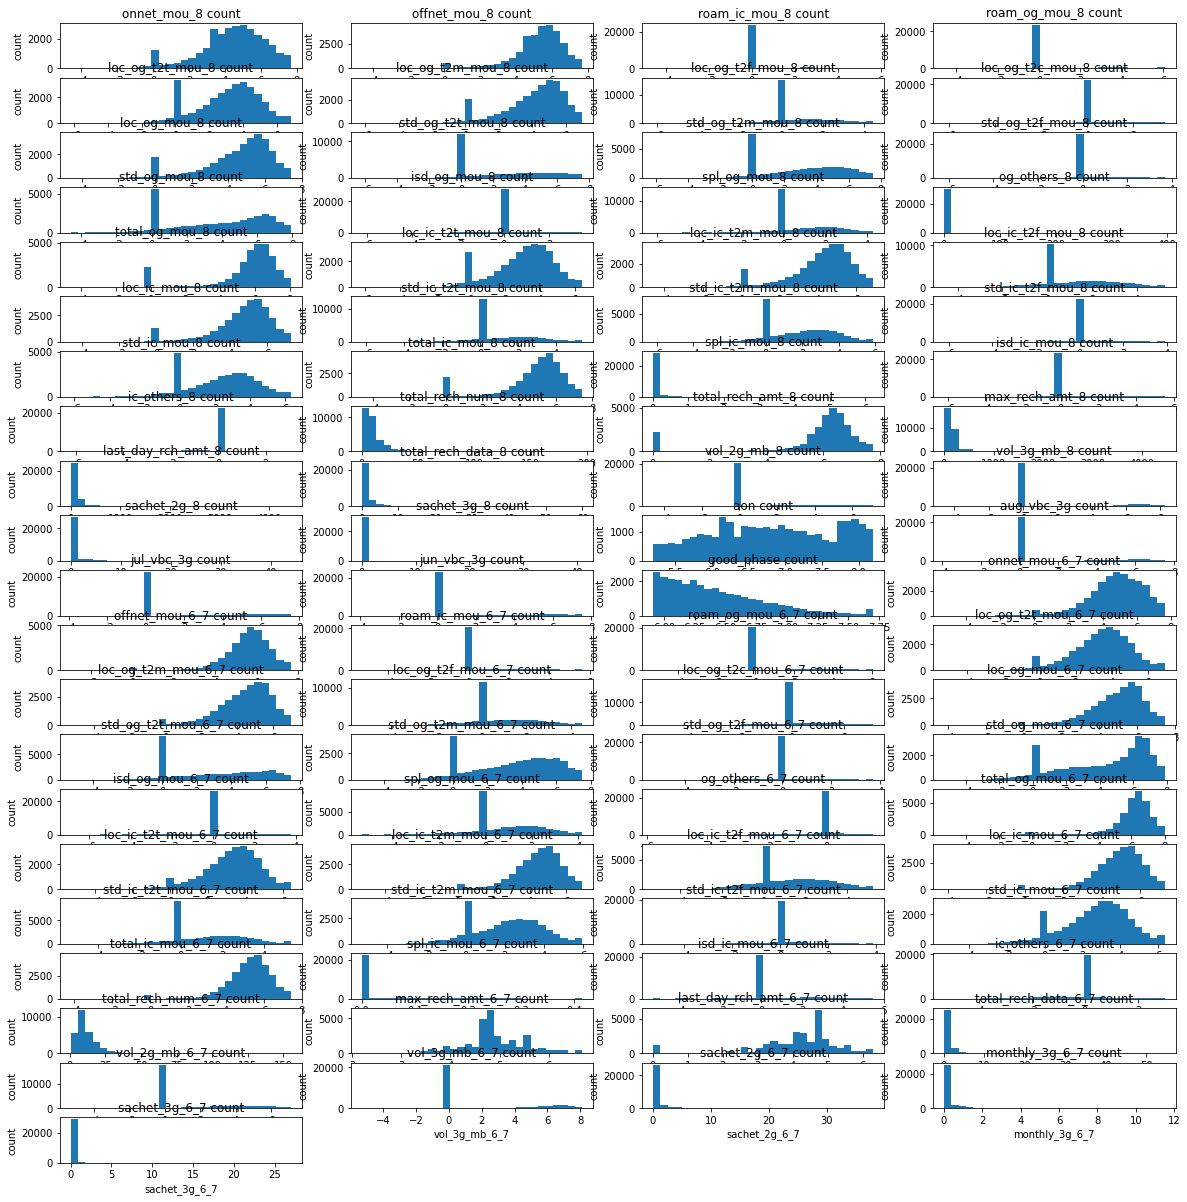

In [ ]:
plt.figure(figsize=(20,25))
for feature in cont:
    plt.subplot(25,4,(cont.index(feature)+1))
    plt.hist(x=feature,bins=30,data=dfI)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

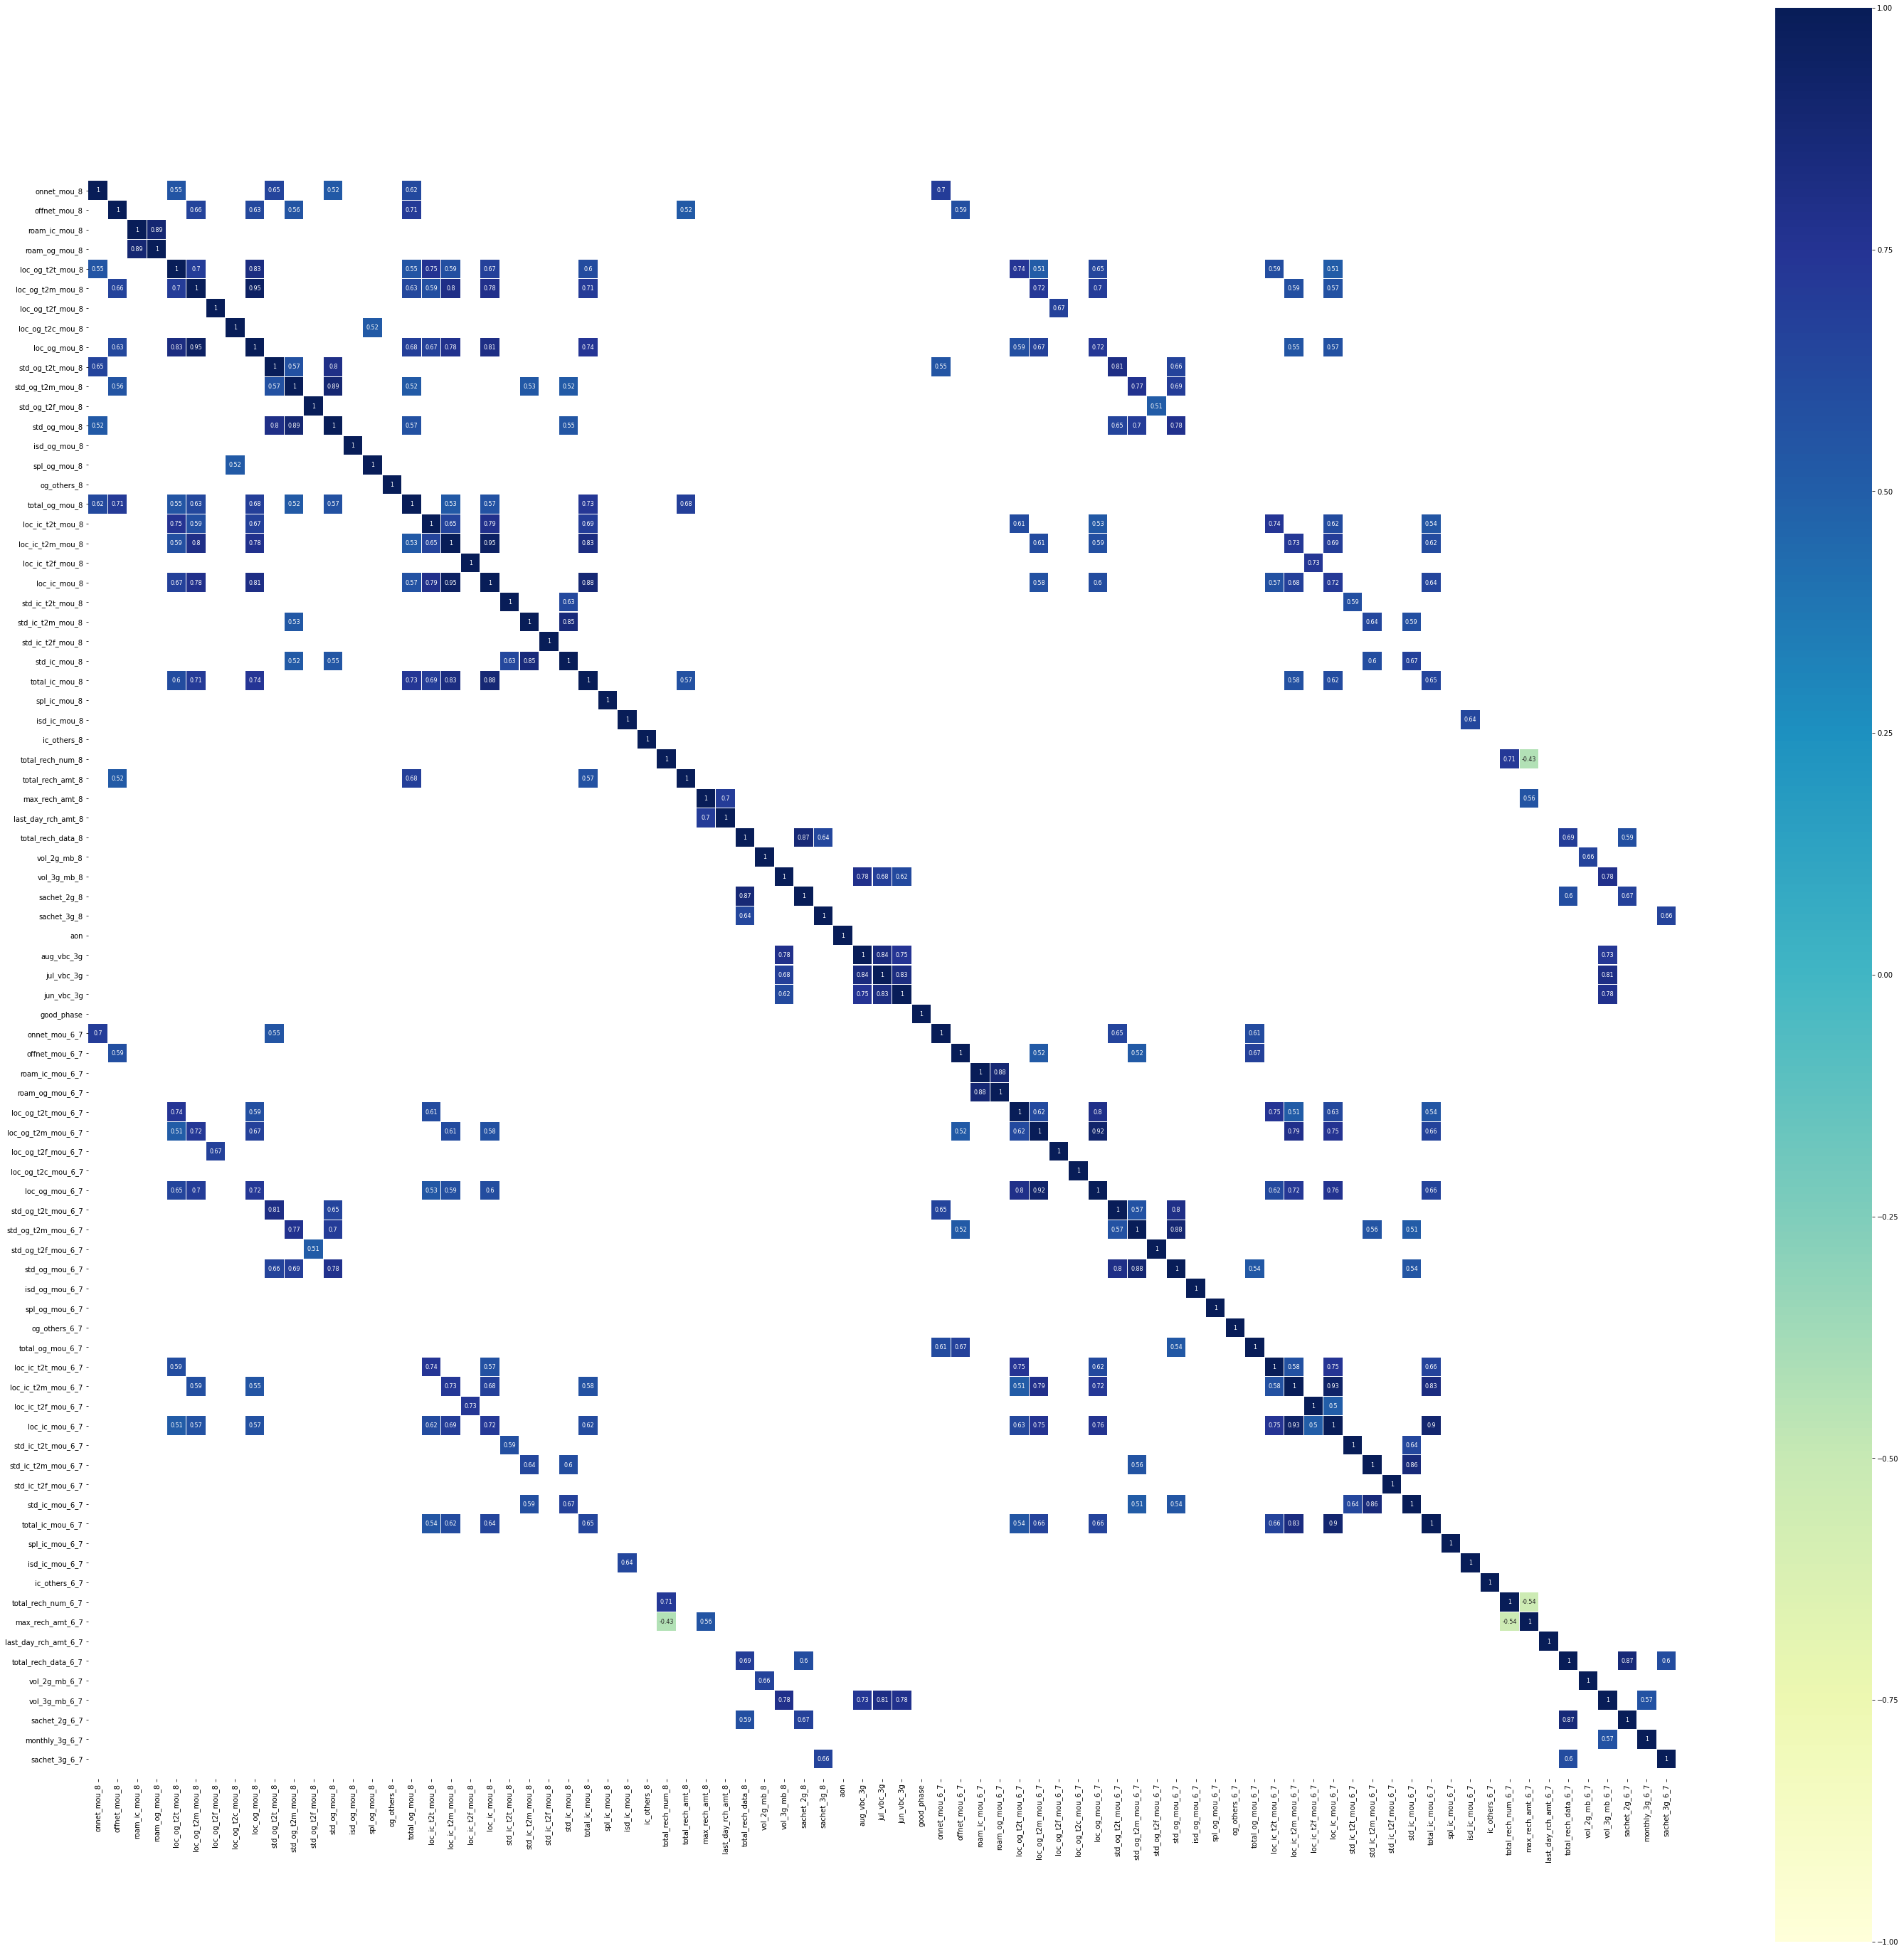

In [ ]:


#Correlation
corr = dfI[cont].corr() 
plt.figure(figsize=(50, 50))
ax = sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

In [ ]:
for x in [x for x in dfI.columns if dfI[x].nunique()<30]:
    print(x,dfI[x].unique())

loc_og_t2o_mou [0. 1.]
std_og_t2o_mou [0. 1.]
loc_ic_t2o_mou [0. 1.]
std_og_t2c_mou_8 [0. 1.]
std_ic_t2o_mou_8 [0. 1.]
monthly_2g_8 [0. 1. 2. 5. 3. 4.]
monthly_3g_8 [ 0.  1.  2.  7.  3.  4.  6.  5.  8. 10.  9. 16.]
sachet_3g_8 [ 0.  2.  5.  1.  4.  7. 23. 27.  3. 13.  8.  6. 21. 12. 25. 10. 15.  9.
 38. 19. 14. 18. 11. 17. 16. 20. 29. 41. 30.]
churn [1. 0.]
std_og_t2c_mou_6_7 [0. 1.]
std_ic_t2o_mou_6_7 [0. 1.]
monthly_2g_6_7 [0.  0.5 1.  1.5 3.5 2.5 2.  3.  4.5]
monthly_3g_6_7 [ 0.   4.5  1.5  1.   0.5  2.   5.5  3.5  5.   2.5  3.   6.5  4.   6.
  7.   8.   9.5 11.5  9.  10. ]


In [ ]:
y = dfI.pop('churn')
y=X.copy()

In [ ]:
X=dfI.copy()

In [ ]:
y = pd.DataFrame(y,columns=['churn'])
y

,churn
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30006,0.0
30007,0.0
30008,0.0
30009,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

Handling the imbalance in the Dataset Using SMOTE .

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_SMOTE,columns=X_train.columns)
y_train = pd.DataFrame(y_train_SMOTE,columns=y_train.columns)

#Checking the changed shape
print(X_train.shape)
print(y_train.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(38278, 91)
(38278, 1)


In [ ]:
log1 = LogisticRegression(max_iter=500,class_weight={0:3,1:9},n_jobs=-1)

In [ ]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7,good_phase,onnet_mou_6_7,offnet_mou_6_7,roam_ic_mou_6_7,roam_og_mou_6_7,loc_og_t2t_mou_6_7,loc_og_t2m_mou_6_7,loc_og_t2f_mou_6_7,loc_og_t2c_mou_6_7,loc_og_mou_6_7,std_og_t2t_mou_6_7,std_og_t2m_mou_6_7,std_og_t2f_mou_6_7,std_og_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,og_others_6_7,total_og_mou_6_7,loc_ic_t2t_mou_6_7,loc_ic_t2m_mou_6_7,loc_ic_t2f_mou_6_7,loc_ic_mou_6_7,std_ic_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_ic_t2f_mou_6_7,std_ic_mou_6_7,total_ic_mou_6_7,spl_ic_mou_6_7,isd_ic_mou_6_7,ic_others_6_7,total_rech_num_6_7,max_rech_amt_6_7,last_day_rch_amt_6_7,total_rech_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7
0,0.0,0.0,0.0,4.883484,5.903971,0.000000,0.000000,4.883484,5.807031,1.813195,1.894617,6.154561,0.000000,0.463734,2.833801,0.0,2.923699,0.10436,2.079442,0.0,6.211784,4.619960,4.954982,-1.386294,5.495651,0.000000,2.805177,0.000000,0.0,2.805177,6.729932,0.000000,5.522792,3.069447,8.000000,5.863631,200.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,7.695758,0.000000,0.000000,0.000000,0.0,0.0,6.067268,4.977940,5.741913,0.000000,0.000000,4.977940,5.588278,2.796976,1.561298,6.061131,0.000000,1.691939,2.707717,3.016760,1.034962,1.561298,0.000000,6.124410,4.877180,5.412561,2.554510,5.908993,0.000000,2.409195,2.872717,3.361070,6.853267,0.140000,5.494324,0.593327,7.500000,4.700480,4.653960,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,6.094427,7.600617,0.000000,0.000000,5.209650,6.996303,0.000000,1.075002,7.375450,5.561988,6.368547,0.000000,0.0,6.737631,0.00000,1.075002,0.0,7.800904,4.441356,6.581249,1.845300,6.700337,0.815365,1.625311,0.000000,0.0,1.993339,6.709646,0.250000,0.000000,0.000000,10.000000,7.144407,150.000000,150.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,7.926964,3.904998,2.870169,0.000000,0.0,0.0,7.162397,6.004899,6.869742,5.637449,5.211424,5.006928,6.095228,0.000000,0.000000,6.385506,5.377152,5.927353,0.000000,6.382780,0.000000,0.000000,0.000000,7.077296,4.025798,6.628385,0.000000,6.699857,1.413423,2.660260,0.000000,2.913166,6.741972,0.100000,2.751748,-0.321584,11.500000,5.786897,5.616771,1.000000,1.245594,4.971652,0.0,0.0,1.000000,0.000000
2,0.0,0.0,0.0,3.993234,6.132877,0.000000,0.000000,3.993234,3.175133,0.000000,0.000000,4.358758,0.000000,6.077849,-0.314711,0.0,6.079544,0.00000,0.867100,0.0,6.248778,4.198855,4.955052,-0.020203,5.344676,0.000000,4.587922,2.513656,0.0,4.706282,6.334717,0.000000,5.495774,0.000000,19.000000,6.284134,86.000000,20.000000,6.0,5.471598,0.000000,0.0,6.0,0.0,0.0,6.769642,0.000000,0.000000,0.000000,0.0,0.0,6.100319,4.140910,5.874158,0.000000,0.000000,4.097838,3.628333,0.000000,0.000000,4.583640,0.974560,5.736217,2.100469,5.770568,0.000000,1.052568,1.040277,6.050417,4.478870,4.999372,-0.139262,5.469473,1.052568,4.849449,0.254642,4.881551,6.378401,0.000000,5.390030,-0.527633,16.500000,4.454347,3.218876,5.000000,4.837789,0.000000,0.0,5.0,0.000000,0.000000
3,0.0,0.0,0.0,3.476923,4.523309,2.026041,3.300861,0.000000,0.327864,0.000000,0.000000,0.327864,3.562636,2.438688,0.000000,1.0,3.844087,0.00000,-2.525729,0.0,0.000000,0.000000,1.605831,0.000000,1.605831,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(log1, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, np.ravel(y_train))

In [ ]:
y_train

,churn
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
38273,1.0
38274,1.0
38275,1.0
38276,1.0


In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 36),
 ('std_og_t2o_mou', False, 32),
 ('loc_ic_t2o_mou', False, 31),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 18),
 ('loc_og_t2m_mou_8', False, 44),
 ('loc_og_t2f_mou_8', False, 29),
 ('loc_og_t2c_mou_8', False, 13),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2t_mou_8', False, 17),
 ('std_og_t2m_mou_8', False, 35),
 ('std_og_t2f_mou_8', False, 41),
 ('std_og_t2c_mou_8', True, 1),
 ('std_og_mou_8', False, 33),
 ('isd_og_mou_8', False, 43),
 ('spl_og_mou_8', False, 58),
 ('og_others_8', False, 62),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 9),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 53),
 ('loc_ic_mou_8', False, 8),
 ('std_ic_t2t_mou_8', False, 51),
 ('std_ic_t2m_mou_8', False, 60),
 ('std_ic_t2f_mou_8', False, 20),
 ('std_ic_t2o_mou_8', True, 1),
 ('std_ic_mou_8', False, 61),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', Tru

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train_col = X_train[col]

In [ ]:
X_train_col

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,std_og_t2c_mou_8,total_og_mou_8,loc_ic_t2m_mou_8,std_ic_t2o_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_data_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,std_og_t2c_mou_6_7,std_ic_t2o_mou_6_7,good_phase,onnet_mou_6_7,offnet_mou_6_7,total_og_mou_6_7,total_ic_mou_6_7,spl_ic_mou_6_7,monthly_3g_6_7
0,4.883484,5.903971,0.000000,0.000000,0.0,6.211784,4.954982,0.0,6.729932,0.000000,0.0,0.0,0.0,0.0,0.0,7.695758,0.0,0.0,6.067268,4.977940,5.741913,6.124410,6.853267,0.140000,0.000000
1,6.094427,7.600617,0.000000,0.000000,0.0,7.800904,6.581249,0.0,6.709646,0.250000,0.0,0.0,0.0,0.0,0.0,7.926964,0.0,0.0,7.162397,6.004899,6.869742,7.077296,6.741972,0.100000,1.000000
2,3.993234,6.132877,0.000000,0.000000,0.0,6.248778,4.955052,0.0,6.334717,0.000000,6.0,0.0,6.0,0.0,0.0,6.769642,0.0,0.0,6.100319,4.140910,5.874158,6.050417,6.378401,0.000000,0.000000
3,3.476923,4.523309,2.026041,3.300861,1.0,0.000000,1.605831,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.712956,0.0,0.0,6.256709,6.658249,1.655367,6.646274,3.129826,0.000000,0.000000
4,3.541829,5.935106,0.000000,0.000000,0.0,6.022503,5.555630,0.0,6.035816,0.000000,1.0,0.0,0.0,1.0,0.0,6.922644,0.0,0.0,6.433744,3.372626,5.754745,5.846352,5.954736,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38273,3.068917,4.867825,0.000000,0.000000,0.0,5.021398,3.924479,0.0,4.061482,0.000000,0.0,0.0,0.0,0.0,0.0,6.523722,0.0,0.0,6.317726,4.777628,4.967802,5.593541,4.848073,0.192901,0.000000
38274,3.476923,4.523309,-1.042694,-0.090406,1.0,0.000000,2.655165,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.982351,0.0,0.0,6.440350,2.215098,7.001633,6.934730,4.871466,0.023790,0.000000
38275,3.476923,4.523309,0.474375,2.542875,1.0,0.000000,2.785578,1.0,0.000000,0.011479,0.0,0.0,0.0,0.0,0.0,5.487708,0.0,0.0,6.466969,5.996966,5.794288,6.603767,5.380556,0.336291,0.000000
38276,0.406699,-0.125850,0.000000,0.000000,0.0,0.613202,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.396065,0.0,0.0,5.943410,5.586306,5.690100,6.335902,5.015854,0.058244,0.323579


In [ ]:
import statsmodels.api as sm

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_col)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38255
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13523.
Date:                Mon, 31 Aug 2020   Deviance:                       27046.
Time:                        14:50:14   Pearson chi2:                 9.60e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9791      0.297      3.299      0.001       0.397       1.561
onnet_mou_8           -0.2849      0.017    -16.429      0.000      -0.319      -0.251
offnet_mou_8          -0.3618      0.022    -16.292      0.000      -0.405      -0.318
roam_ic_mou_8         -0.2390      0.021    -11.190      0.000      -0.281      -0.197
roam_og_mou_8          0.6126      0.018     33.518      0.000       0.577       0.648
std_og_t2c_mou_8       1.8545      0.081     22.910      0.000       1.696       2.013
total_og_mou_8         0.3559      0.025     14.431      0.000       0.308       0.404
loc_ic_t2m_mou_8      -0.2122      0.020    -10.407      0.000      -0.252      -0.172
std_ic_t2o_mou_8       1.8545      0.081     22.910      0.000       1.696       2.013
total_ic_mou_8        -0.5904      0.028    -20.967      0.000      -0.646      -0.535
spl_ic_mou_8          -1.3083      0.186     -7.044      0.000      -1.672      -0.944
total_rech_data_8     -0.5166      0.022    -23.832      0.000      -0.559      -0.474
monthly_2g_8          -0.6363      0.061    -10.439      0.000      -0.756      -0.517
sachet_2g_8            0.3513      0.025     14.097      0.000       0.302       0.400
monthly_3g_8          -0.5721      0.052    -10.995      0.000      -0.674      -0.470
sachet_3g_8            0.3404      0.034      9.891      0.000       0.273       0.408
aon                   -0.4421      0.022    -20.221      0.000      -0.485      -0.399
std_og_t2c_mou_6_7     0.9532      0.065     14.585      0.000       0.825       1.081
std_ic_t2o_mou_6_7     0.9532      0.065     14.585      0.000       0.825       1.081
good_phase             0.3414      0.046      7.388      0.000       0.251       0.432
onnet_mou_6_7          0.2097      0.019     11.080      0.000       0.173       0.247
offnet_mou_6_7         0.3041      0.026     11.575      0.000       0.253       0.356
total_og_mou_6_7      -0.2903      0.029    -10.037      0.000      -0.347      -0.234
total_ic_mou_6_7       0.4845      0.024     20.043      0.000       0.437       0.532
spl_ic_mou_6_7        -0.1434      0.190     -0.754      0.451      -0.516       0.229
monthly_3g_6_7         0.2644      0.051      5.155      0.000       0.164       0.365
======================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,sachet_2g_8,inf
10,total_rech_data_8,inf
17,std_ic_t2o_mou_6_7,inf
16,std_og_t2c_mou_6_7,inf
4,std_og_t2c_mou_8,inf
14,sachet_3g_8,inf
13,monthly_3g_8,inf
7,std_ic_t2o_mou_8,inf
11,monthly_2g_8,inf
18,good_phase,122.85


In [ ]:
X_train_col.drop(columns='sachet_2g_8',inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
16,std_ic_t2o_mou_6_7,inf
15,std_og_t2c_mou_6_7,inf
4,std_og_t2c_mou_8,inf
7,std_ic_t2o_mou_8,inf
17,good_phase,122.85
20,total_og_mou_6_7,98.20
14,aon,71.62
19,offnet_mou_6_7,65.71
5,total_og_mou_8,53.96
21,total_ic_mou_6_7,52.12


In [ ]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_col)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38255
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13523.
Date:                Mon, 31 Aug 2020   Deviance:                       27046.
Time:                        15:08:04   Pearson chi2:                 9.60e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9791      0.297      3.299      0.001       0.397       1.561
onnet_mou_8           -0.2849      0.017    -16.429      0.000      -0.319      -0.251
offnet_mou_8          -0.3618      0.022    -16.292      0.000      -0.405      -0.318
roam_ic_mou_8         -0.2390      0.021    -11.190      0.000      -0.281      -0.197
roam_og_mou_8          0.6126      0.018     33.518      0.000       0.577       0.648
std_og_t2c_mou_8       1.8545      0.081     22.910      0.000       1.696       2.013
total_og_mou_8         0.3559      0.025     14.431      0.000       0.308       0.404
loc_ic_t2m_mou_8      -0.2122      0.020    -10.407      0.000      -0.252      -0.172
std_ic_t2o_mou_8       1.8545      0.081     22.910      0.000       1.696       2.013
total_ic_mou_8        -0.5904      0.028    -20.967      0.000      -0.646      -0.535
spl_ic_mou_8          -1.3083      0.186     -7.044      0.000      -1.672      -0.944
total_rech_data_8     -0.1653      0.015    -11.344      0.000      -0.194      -0.137
monthly_2g_8          -0.9876      0.076    -12.955      0.000      -1.137      -0.838
monthly_3g_8          -0.9234      0.064    -14.333      0.000      -1.050      -0.797
sachet_3g_8           -0.0109      0.040     -0.270      0.787      -0.090       0.068
aon                   -0.4421      0.022    -20.221      0.000      -0.485      -0.399
std_og_t2c_mou_6_7     0.9532      0.065     14.585      0.000       0.825       1.081
std_ic_t2o_mou_6_7     0.9532      0.065     14.585      0.000       0.825       1.081
good_phase             0.3414      0.046      7.388      0.000       0.251       0.432
onnet_mou_6_7          0.2097      0.019     11.080      0.000       0.173       0.247
offnet_mou_6_7         0.3041      0.026     11.575      0.000       0.253       0.356
total_og_mou_6_7      -0.2903      0.029    -10.037      0.000      -0.347      -0.234
total_ic_mou_6_7       0.4845      0.024     20.043      0.000       0.437       0.532
spl_ic_mou_6_7        -0.1434      0.190     -0.754      0.451      -0.516       0.229
monthly_3g_6_7         0.2644      0.051      5.155      0.000       0.164       0.365
======================================================================================
"""

In [ ]:
X_train_col.drop(columns='sachet_3g_8',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
15,std_ic_t2o_mou_6_7,inf
14,std_og_t2c_mou_6_7,inf
4,std_og_t2c_mou_8,inf
7,std_ic_t2o_mou_8,inf
16,good_phase,122.59
19,total_og_mou_6_7,98.19
13,aon,71.56
18,offnet_mou_6_7,65.69
5,total_og_mou_8,53.96
20,total_ic_mou_6_7,52.12


In [ ]:
X_train_col.drop(columns = 'std_ic_t2o_mou_6_7',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_col)), family = sm.families.Binomial())
logm3 = logm3.fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38256
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13523.
Date:                Mon, 31 Aug 2020   Deviance:                       27046.
Time:                        15:11:32   Pearson chi2:                 9.61e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9807      0.297      3.305      0.001       0.399       1.562
onnet_mou_8           -0.2849      0.017    -16.429      0.000      -0.319      -0.251
offnet_mou_8          -0.3618      0.022    -16.291      0.000      -0.405      -0.318
roam_ic_mou_8         -0.2388      0.021    -11.187      0.000      -0.281      -0.197
roam_og_mou_8          0.6125      0.018     33.517      0.000       0.577       0.648
std_og_t2c_mou_8       1.8549      0.081     22.916      0.000       1.696       2.014
total_og_mou_8         0.3559      0.025     14.434      0.000       0.308       0.404
loc_ic_t2m_mou_8      -0.2122      0.020    -10.407      0.000      -0.252      -0.172
std_ic_t2o_mou_8       1.8549      0.081     22.916      0.000       1.696       2.014
total_ic_mou_8        -0.5905      0.028    -20.969      0.000      -0.646      -0.535
spl_ic_mou_8          -1.3081      0.186     -7.044      0.000      -1.672      -0.944
total_rech_data_8     -0.1674      0.012    -13.454      0.000      -0.192      -0.143
monthly_2g_8          -0.9853      0.076    -13.007      0.000      -1.134      -0.837
monthly_3g_8          -0.9208      0.064    -14.454      0.000      -1.046      -0.796
aon                   -0.4420      0.022    -20.221      0.000      -0.485      -0.399
std_og_t2c_mou_6_7     1.9071      0.131     14.593      0.000       1.651       2.163
good_phase             0.3406      0.046      7.385      0.000       0.250       0.431
onnet_mou_6_7          0.2099      0.019     11.090      0.000       0.173       0.247
offnet_mou_6_7         0.3043      0.026     11.588      0.000       0.253       0.356
total_og_mou_6_7      -0.2902      0.029    -10.036      0.000      -0.347      -0.234
total_ic_mou_6_7       0.4846      0.024     20.045      0.000       0.437       0.532
spl_ic_mou_6_7        -0.1432      0.190     -0.753      0.451      -0.516       0.229
monthly_3g_6_7         0.2635      0.051      5.150      0.000       0.163       0.364
======================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,std_og_t2c_mou_8,inf
7,std_ic_t2o_mou_8,inf
15,good_phase,122.59
18,total_og_mou_6_7,98.19
13,aon,71.56
17,offnet_mou_6_7,65.69
5,total_og_mou_8,53.96
19,total_ic_mou_6_7,52.12
8,total_ic_mou_8,48.32
1,offnet_mou_8,41.08


In [401]:
X_train_col.drop(columns = ['spl_ic_mou_6_7','std_og_t2c_mou_8'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [402]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_col)), family = sm.families.Binomial())
logm4 = logm4.fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38278
Model:                            GLM   Df Residuals:                    38257
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13523.
Date:                Mon, 31 Aug 2020   Deviance:                       27046.
Time:                        15:17:47   Pearson chi2:                 9.78e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9597      0.295      3.248      0.001       0.381       1.539
onnet_mou_8           -0.2854      0.017    -16.467      0.000      -0.319      -0.251
offnet_mou_8          -0.3615      0.022    -16.280      0.000      -0.405      -0.318
roam_ic_mou_8         -0.2382      0.021    -11.168      0.000      -0.280      -0.196
roam_og_mou_8          0.6123      0.018     33.514      0.000       0.577       0.648
total_og_mou_8         0.3559      0.025     14.433      0.000       0.308       0.404
loc_ic_t2m_mou_8      -0.2129      0.020    -10.451      0.000      -0.253      -0.173
std_ic_t2o_mou_8       3.7149      0.162     22.966      0.000       3.398       4.032
total_ic_mou_8        -0.5895      0.028    -20.958      0.000      -0.645      -0.534
spl_ic_mou_8          -1.3249      0.184     -7.182      0.000      -1.686      -0.963
total_rech_data_8     -0.1672      0.012    -13.447      0.000      -0.192      -0.143
monthly_2g_8          -0.9844      0.076    -12.997      0.000      -1.133      -0.836
monthly_3g_8          -0.9207      0.064    -14.457      0.000      -1.046      -0.796
aon                   -0.4396      0.022    -20.329      0.000      -0.482      -0.397
std_og_t2c_mou_6_7     1.9066      0.131     14.591      0.000       1.650       2.163
good_phase             0.3407      0.046      7.386      0.000       0.250       0.431
onnet_mou_6_7          0.2101      0.019     11.102      0.000       0.173       0.247
offnet_mou_6_7         0.3047      0.026     11.602      0.000       0.253       0.356
total_og_mou_6_7      -0.2902      0.029    -10.033      0.000      -0.347      -0.233
total_ic_mou_6_7       0.4833      0.024     20.040      0.000       0.436       0.531
monthly_3g_6_7         0.2643      0.051      5.167      0.000       0.164       0.365
======================================================================================
"""

In [403]:
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,good_phase,120.70
17,total_og_mou_6_7,98.19
12,aon,70.61
16,offnet_mou_6_7,65.60
4,total_og_mou_8,53.96
18,total_ic_mou_6_7,51.90
7,total_ic_mou_8,48.31
1,offnet_mou_8,41.08
15,onnet_mou_6_7,29.25
5,loc_ic_t2m_mou_8,22.59


In [404]:
X_train_sm=sm.add_constant(X_train_col)
y_train_pred = logm4.predict(X_train_sm)

In [405]:
y_train_pred

0        0.085871
1        0.065432
2        0.053336
3        0.980387
4        0.055967
           ...   
38273    0.355159
38274    0.984933
38275    0.998313
38276    0.987112
38277    0.985196
Length: 38278, dtype: float64

In [406]:
from sklearn import metrics

In [407]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

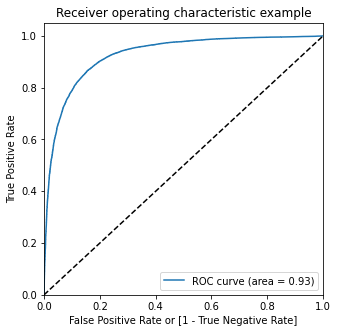

In [408]:
draw_roc(y_train, y_train_pred)

In [409]:
y_train_pred_final = pd.DataFrame(y_train_pred)

In [410]:
y_train_pred_final.rename(columns={0:'churn_prob'},inplace=True)

In [411]:
y_train_pred_final

,churn_prob
0,0.085871
1,0.065432
2,0.053336
3,0.980387
4,0.055967
...,...
38273,0.355159
38274,0.984933
38275,0.998313
38276,0.987112


In [412]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.085871,1,0,0,0,0,0,0,0,0,0
1,0.065432,1,0,0,0,0,0,0,0,0,0
2,0.053336,1,0,0,0,0,0,0,0,0,0
3,0.980387,1,1,1,1,1,1,1,1,1,1
4,0.055967,1,0,0,0,0,0,0,0,0,0


In [413]:
y_train_pred_final['churn'] = y_train

In [414]:
y_train_pred_final

,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn
0,0.085871,1,0,0,0,0,0,0,0,0,0,0.0
1,0.065432,1,0,0,0,0,0,0,0,0,0,0.0
2,0.053336,1,0,0,0,0,0,0,0,0,0,0.0
3,0.980387,1,1,1,1,1,1,1,1,1,1,1.0
4,0.055967,1,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38273,0.355159,1,1,1,1,0,0,0,0,0,0,1.0
38274,0.984933,1,1,1,1,1,1,1,1,1,1,1.0
38275,0.998313,1,1,1,1,1,1,1,1,1,1,1.0
38276,0.987112,1,1,1,1,1,1,1,1,1,1,1.0


In [415]:
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall','f1','r2'])
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    precision = precision_score(y_train_pred_final.churn,y_train_pred_final[i])
    
    recall = recall_score(y_train_pred_final.churn,y_train_pred_final[i])
    f1 = f1_score(y_train_pred_final.churn,y_train_pred_final[i])
    r2 = r2_score(y_train_pred_final.churn,y_train_pred_final[i])
    cutoff_df.loc[i] =[i,precision,recall,f1,r2]
print(cutoff_df)

     prob  precision    recall        f1        r2
0.0   0.0   0.500000  1.000000  0.666667 -1.000000
0.1   0.1   0.611466  0.989132  0.755744 -0.278750
0.2   0.2   0.736010  0.957939  0.832437  0.228695
0.3   0.3   0.806450  0.914572  0.857115  0.390146
0.4   0.4   0.848097  0.864935  0.856433  0.420032
0.5   0.5   0.876059  0.816187  0.845064  0.401432
0.6   0.6   0.897601  0.764408  0.825667  0.354407
0.7   0.7   0.916938  0.706568  0.798123  0.285125
0.8   0.8   0.933481  0.638644  0.758415  0.186269
0.9   0.9   0.948923  0.540676  0.688856  0.023146


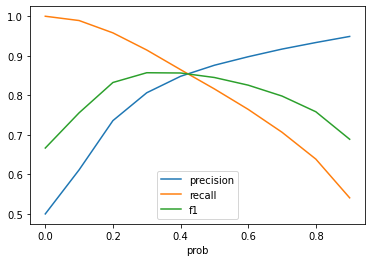

In [416]:
cutoff_df.plot.line(x='prob', y=['precision','recall','f1'])
plt.show()

In [417]:
y_train_pred_final['final pred'] = y_train_pred_final.churn_prob.map(lambda x : 1 if x > 0.4 else 0)

In [418]:
print(classification_report(y_train,y_train_pred_final['final pred']))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     19139
         1.0       0.85      0.86      0.86     19139

    accuracy                           0.86     38278
   macro avg       0.86      0.86      0.85     38278
weighted avg       0.86      0.86      0.85     38278



In [426]:
X_test_sm=sm.add_constant(X_test[X_train_col.columns])
y_test_pred = logm4.predict(X_test_sm)

In [427]:
y_test_pred

4671     0.119057
11416    0.051576
8043     0.159992
6520     0.334537
9296     0.292316
           ...   
26046    0.134193
14991    0.435789
11008    0.984138
21523    0.501059
24710    0.150484
Length: 9004, dtype: float64

In [428]:
y_test_pred = pd.DataFrame(y_test_pred,columns=['churn'])

In [429]:
y_test_pred['churn'] = y_test_pred.churn.map(lambda x : 1 if x>0.4 else 0)

In [430]:
print(classification_report(y_test,y_test_pred.churn))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      8279
         1.0       0.29      0.81      0.43       725

    accuracy                           0.83      9004
   macro avg       0.64      0.82      0.66      9004
weighted avg       0.92      0.83      0.86      9004



### Important churn Predicting variables: 
### monthly_3g_6_7
### monthly_3g_8
### std_og_t2c_mou_6_7
### total_rech_data_8
### monthly_2g_8
### total_ic_mou_8
### spl_ic_mou_8	

# Business Recommendations:

### 1. Give the customer some discount on monthly 3g data.
### 2. Give the customer some benifits on special incoming calls.
### 3. Give the customer some benifits on monthly 2g data services.
### 4. If the customer has high calls to it’s own call       center it might be possible that the customer has some concerns which needs to be addressed so look on to those customers and address their problems thus giving better customer services.